In [12]:
# from settings import  SQL_FOLDER, REDSHIFT_CONN_STR
from datetime import date, datetime, timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lightgbm as lgb

from pylab import rcParams
# from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


rcParams['figure.figsize'] = 12,8
# %matplotlib inline
# Importing all the important libraries which will ease our task later
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score


from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

In [13]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
def dataset(data,City,Season='Kharif',Crop='Bajra'):
    df=data.loc[(data['City']==City) & (data['Season']==Season) & (data['Crop']==Crop)]
    return df

In [15]:
def test_train_split(df):
    X=df.drop(['Yield','Production','State','City','Season','Crop','Area'],axis=1,inplace=False)
    target='Yield'
    y=df[target]
    X_train=X[X.index<2009]
    X_test=X[X.index>=2009]
    y_train=y[y.index<2009]
    y_test=y[y.index>=2009]
    return(X_train,X_test,y_train,y_test)

In [16]:
def cleaning_dataset(df):
    df=df[df['Yield']<=6]
    return(df)

In [17]:
data_guj=pd.read_csv(r"C:\Users\User\Desktop\CE202\dataset_final.csv")
data_guj.drop('Unnamed: 0',axis=1,inplace=True)
data_guj.set_index('Year',inplace=True)

In [18]:
city_selected=['Ahmedabad','Kutch','Kheda','Gandhinagar','Rajkot','Surat']
crop_selected=['Bajra','Arhar/Tur','Wheat','Jowar','Potato','Groundnut']

In [19]:
df = data_guj.loc[(data_guj['City'] == 'Ahmedabad') | (data_guj['City'] == 'Kutch') | (data_guj['City']=='Kheda') | (data_guj['City']=='Gandhinagar')|(data_guj['City']=='Rajkot')|(data_guj['City']=='Surat')]
df = df.loc[(df['Crop']=='Bajra')|(df['Crop']=='Arhar/Tur')|(df['Crop']=='Wheat')|(df['Crop']=='Jowar')|(df['Crop']=='Potato')|(df['Crop']=='Groudnut')]

In [20]:
def best_pca_components(X):
    scaler = StandardScaler()
    X_st = scaler.fit_transform(X)
    
    pca = PCA(n_components = len(X.columns))
    pca.fit(X_st)
    X_pca = pca.transform(X_st)
    exp_variance = np.cumsum(pca.explained_variance_ratio_)
    exp_variance = pd.DataFrame(exp_variance)
    best_components = exp_variance[exp_variance>=0.90]
    best_components = best_components.dropna()
    return min(list(best_components.index))

# Linear Regression

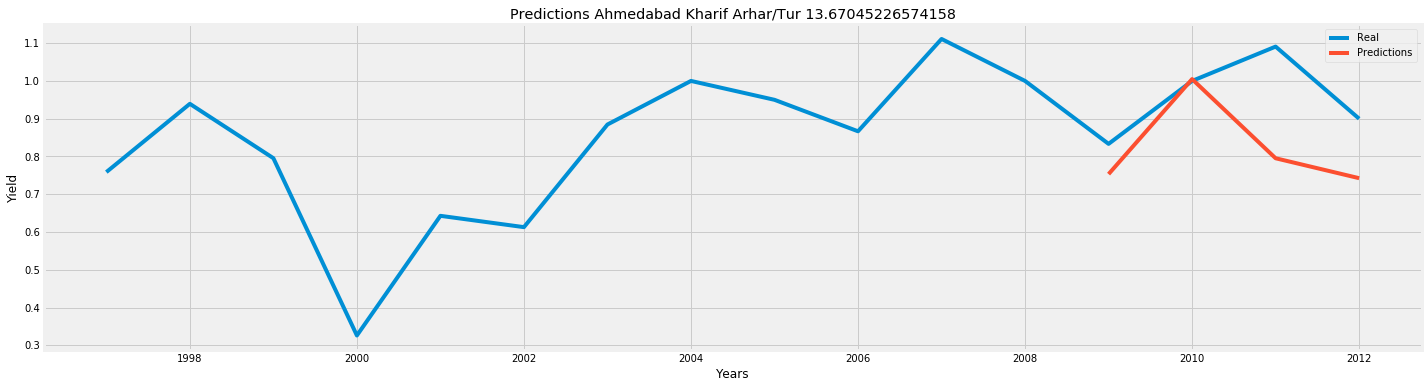

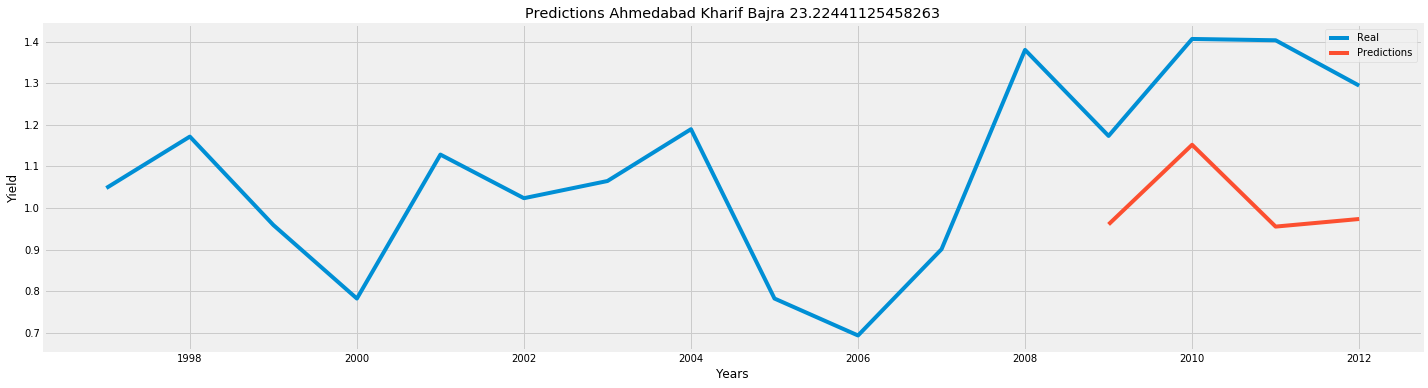

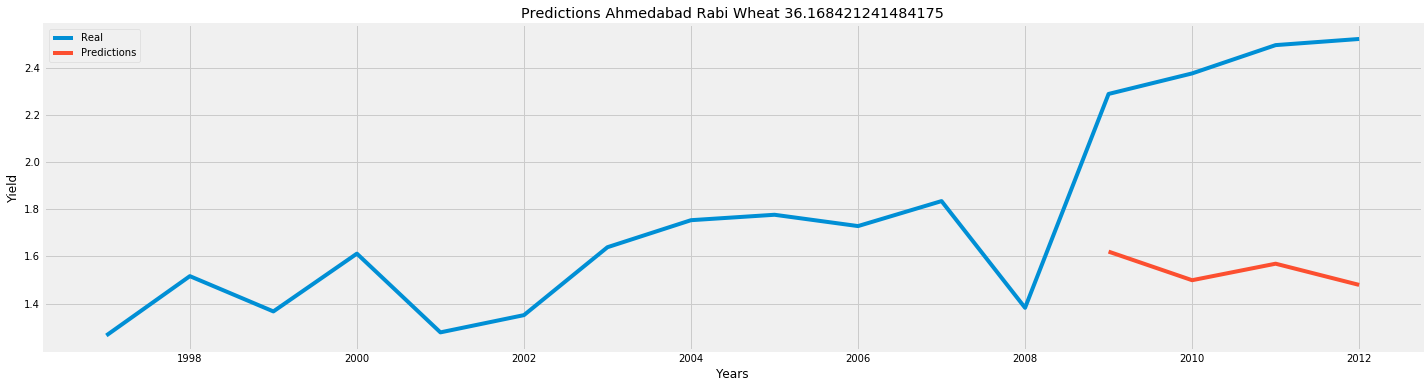

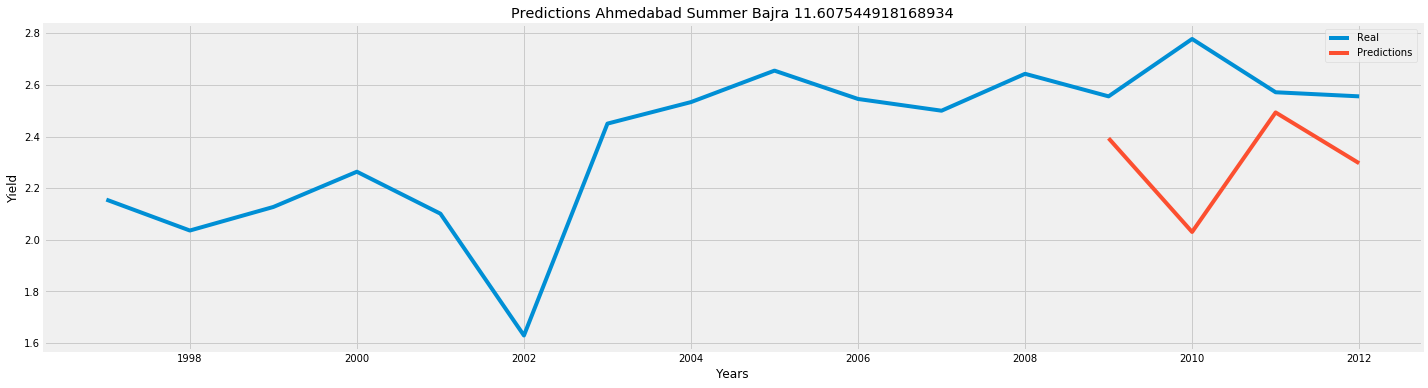

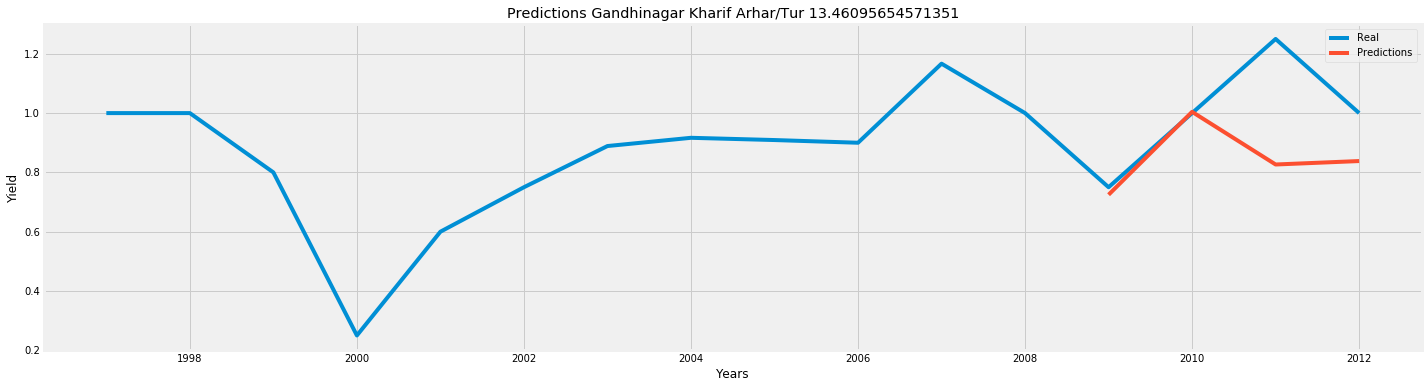

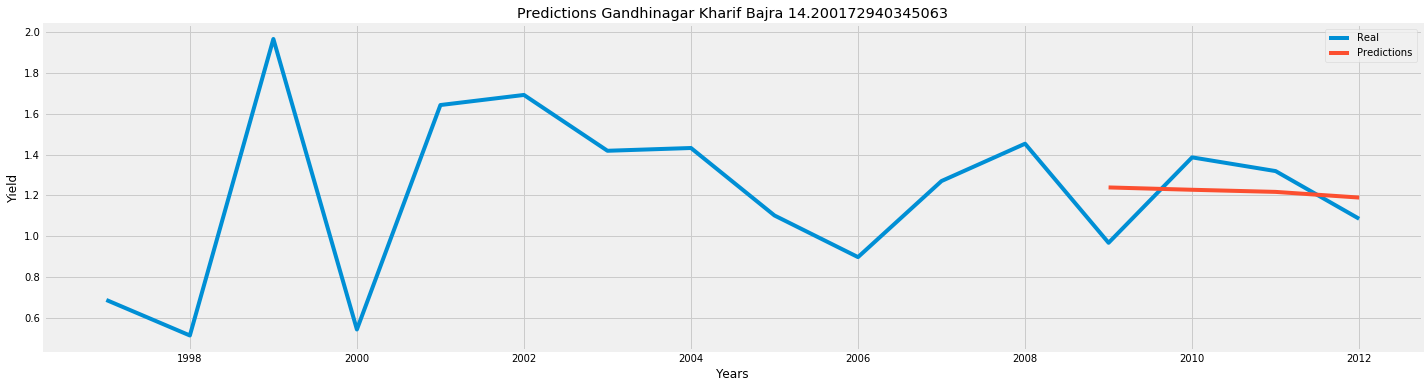

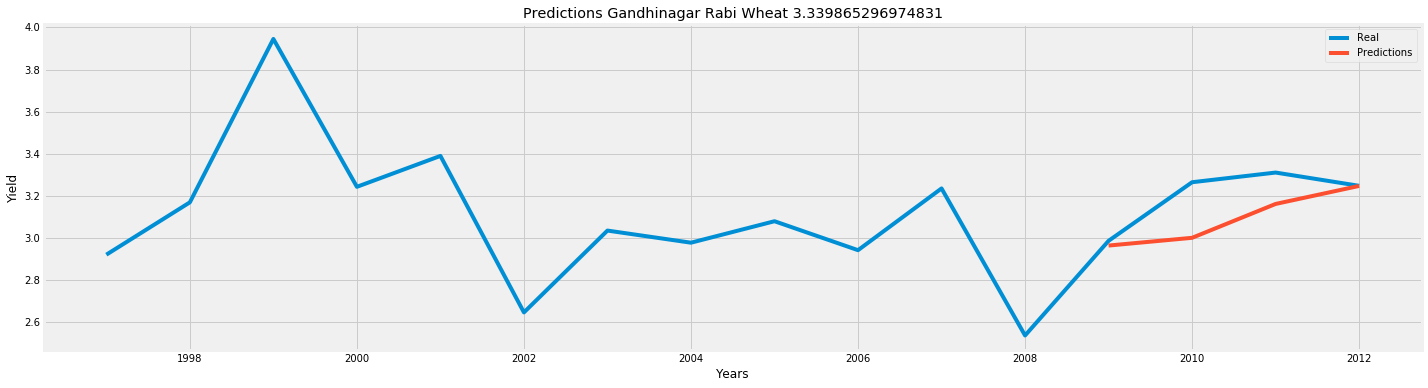

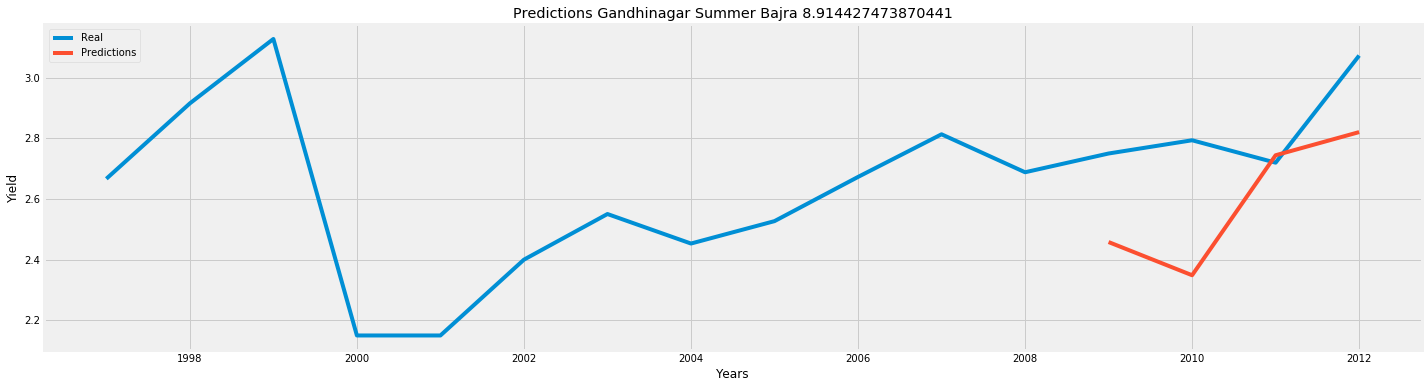

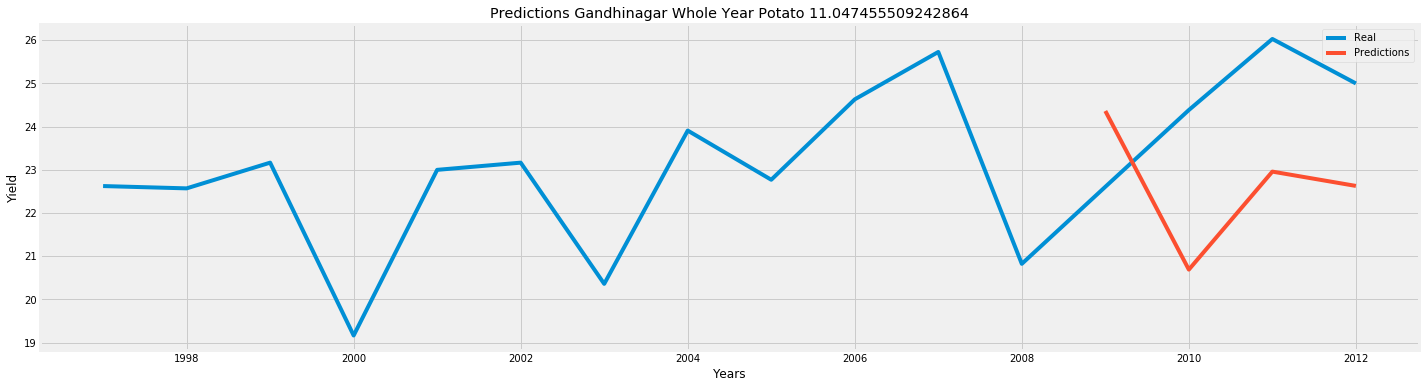

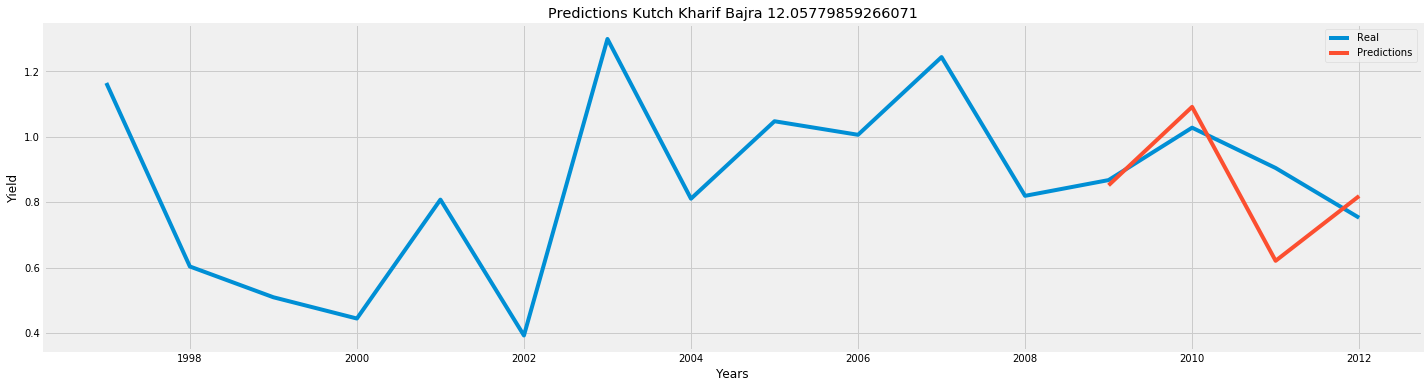

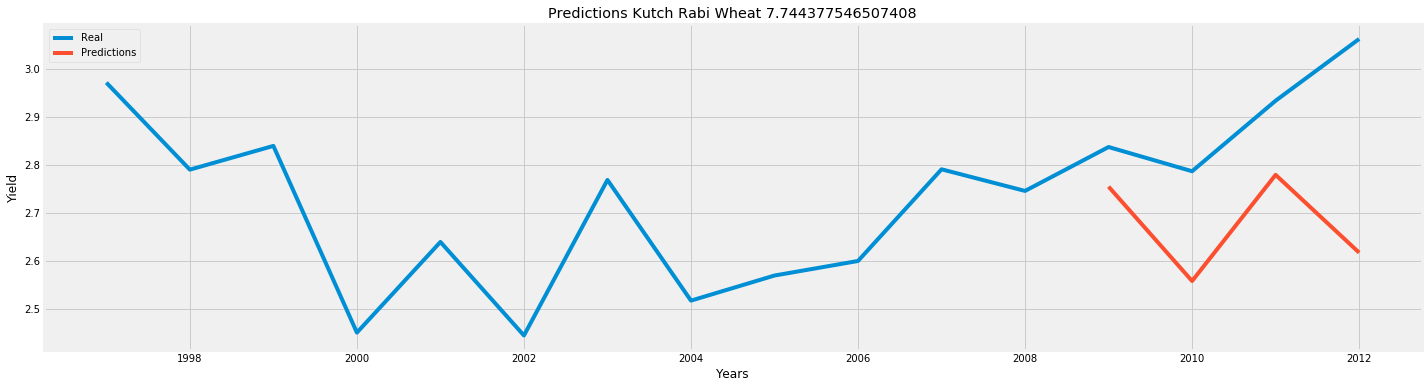

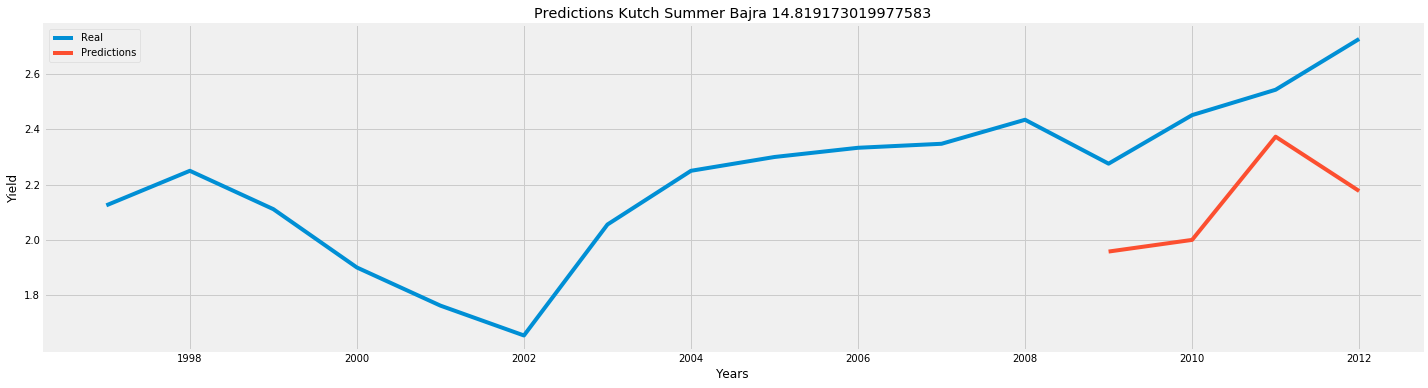

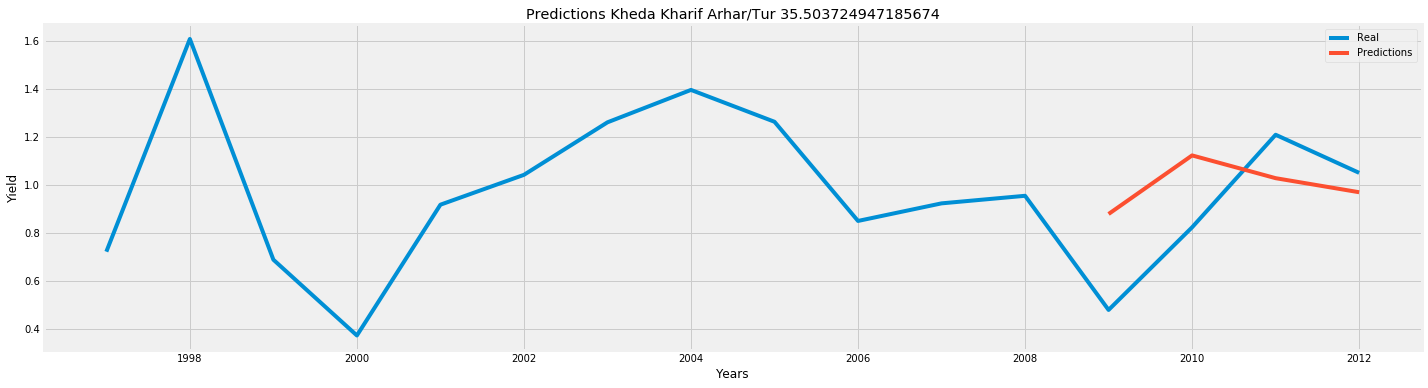

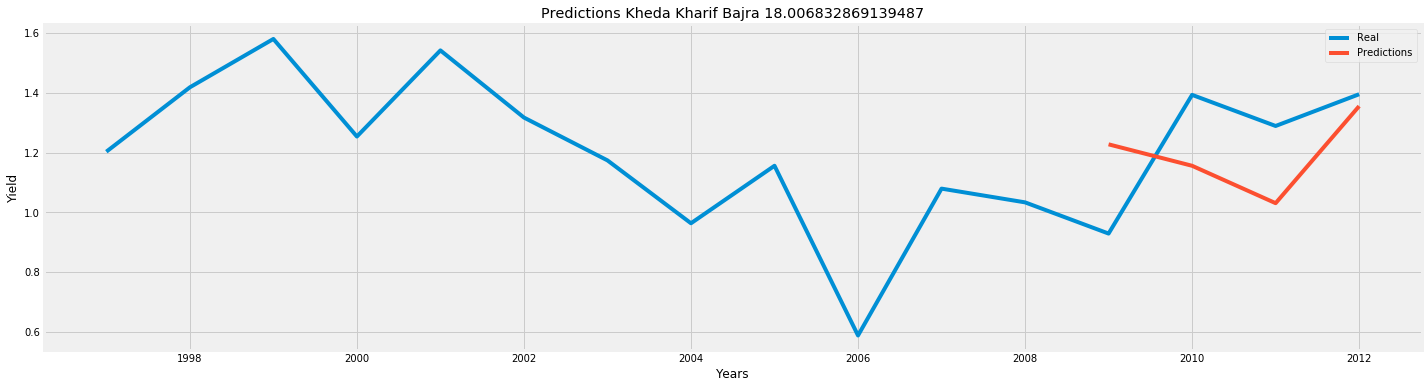

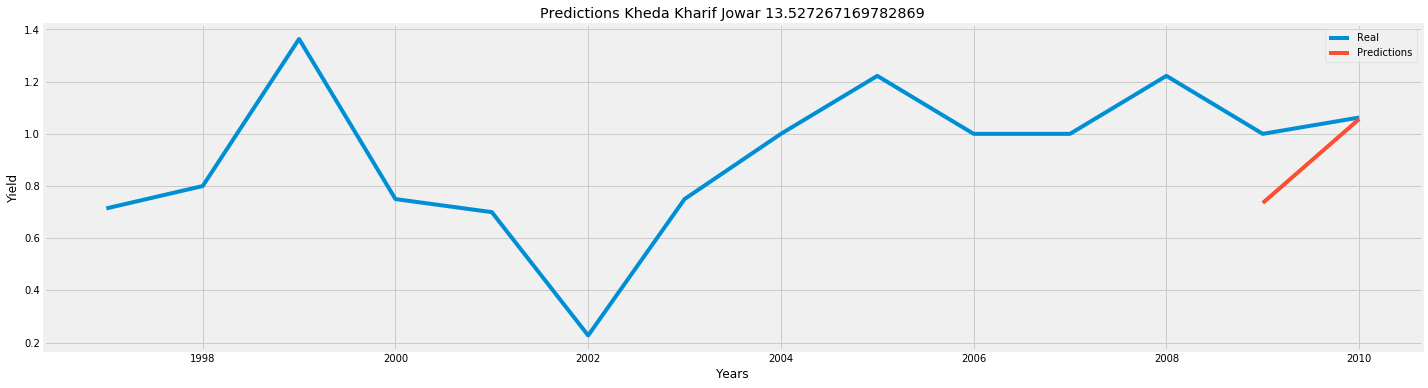

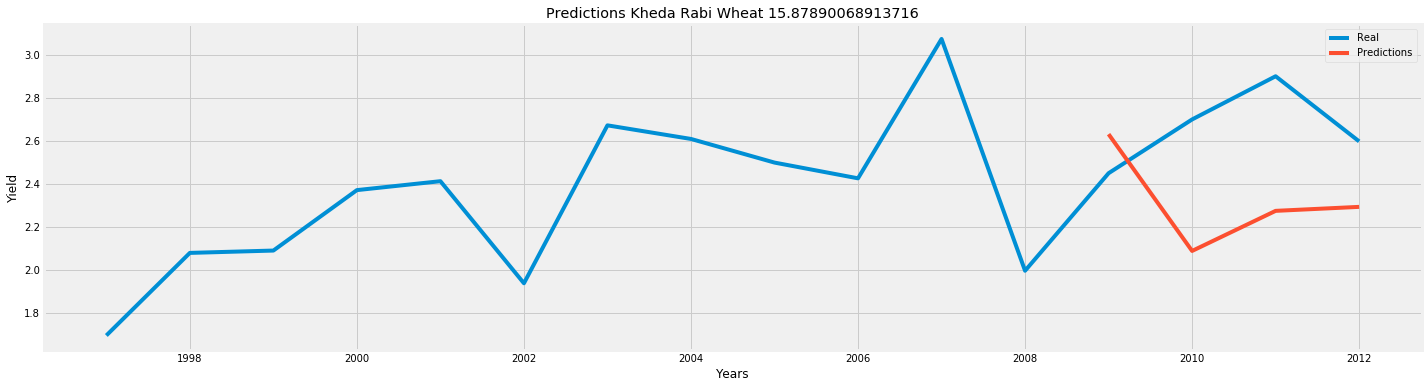

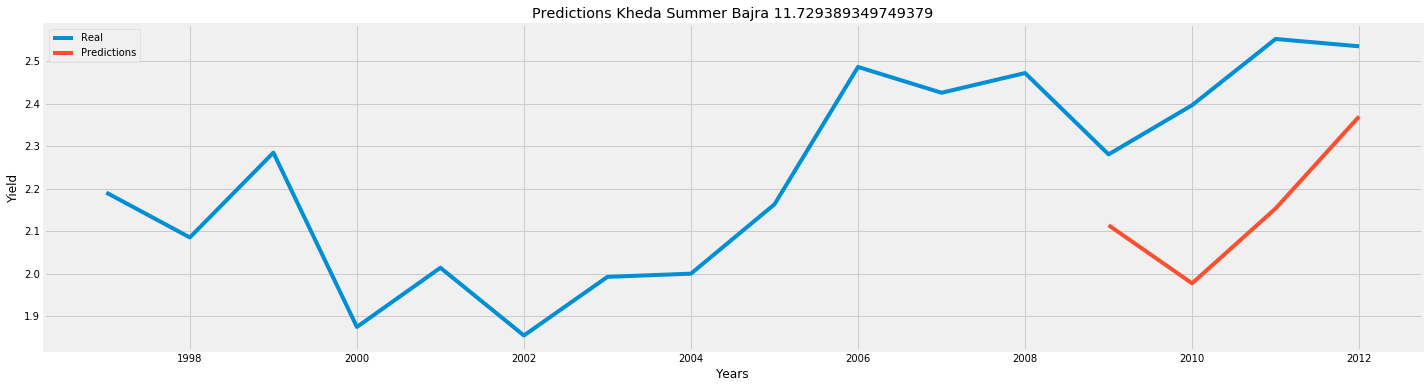

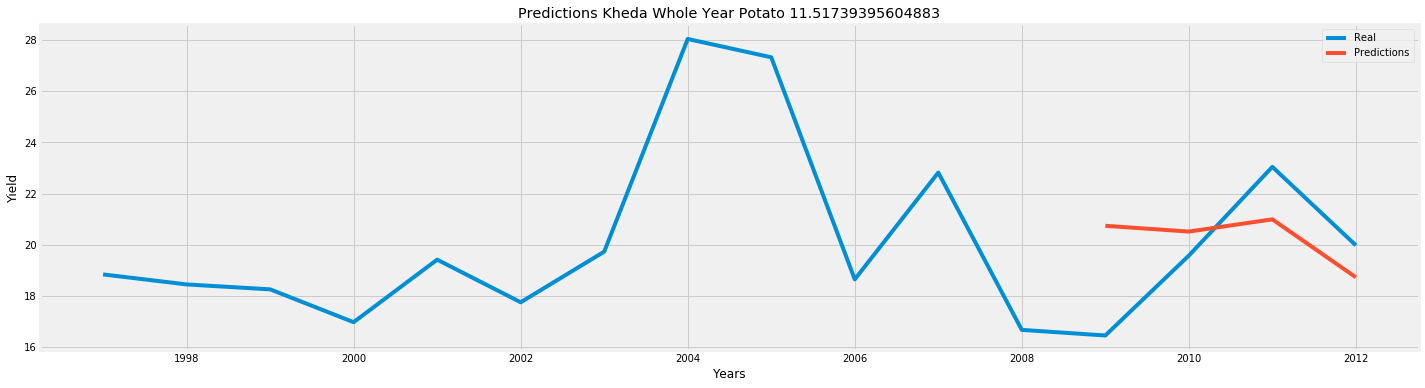

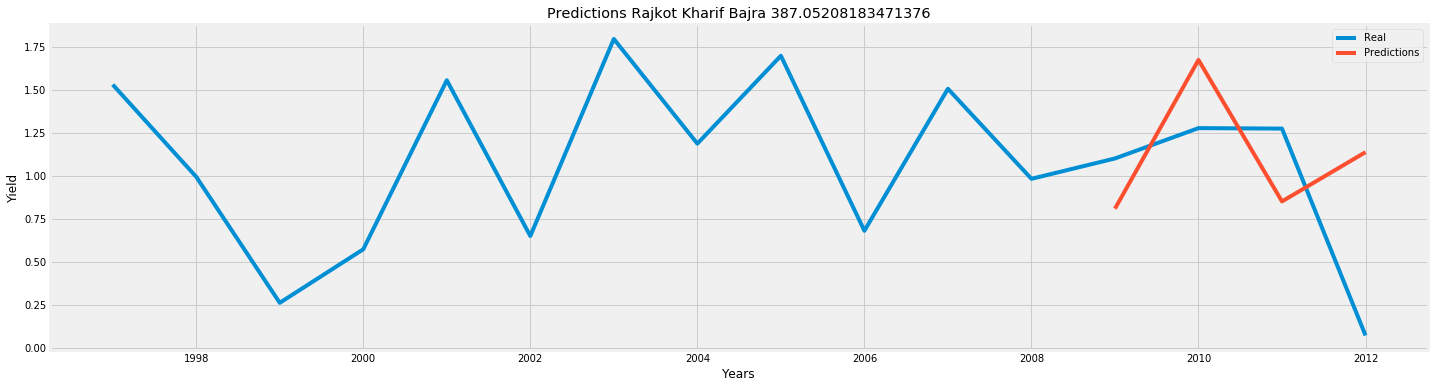

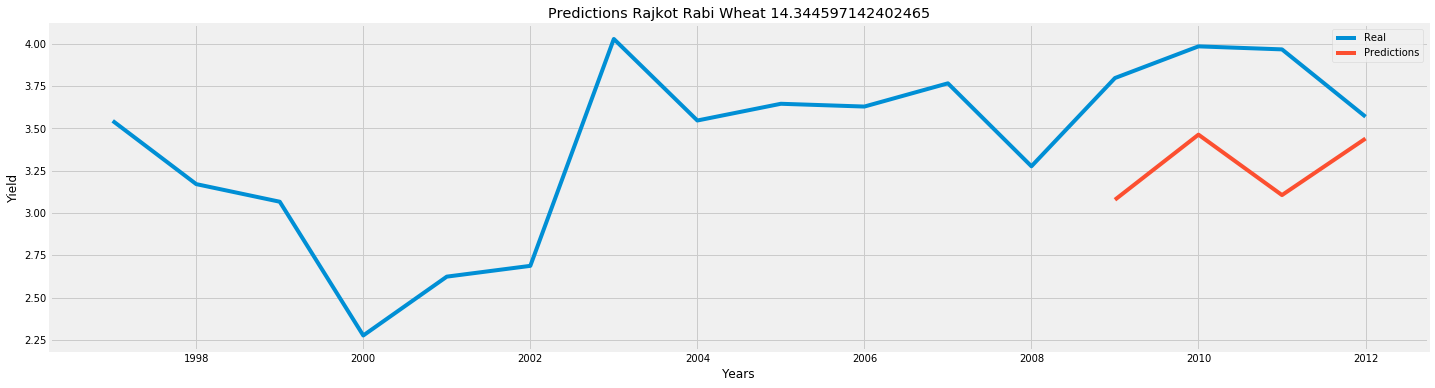

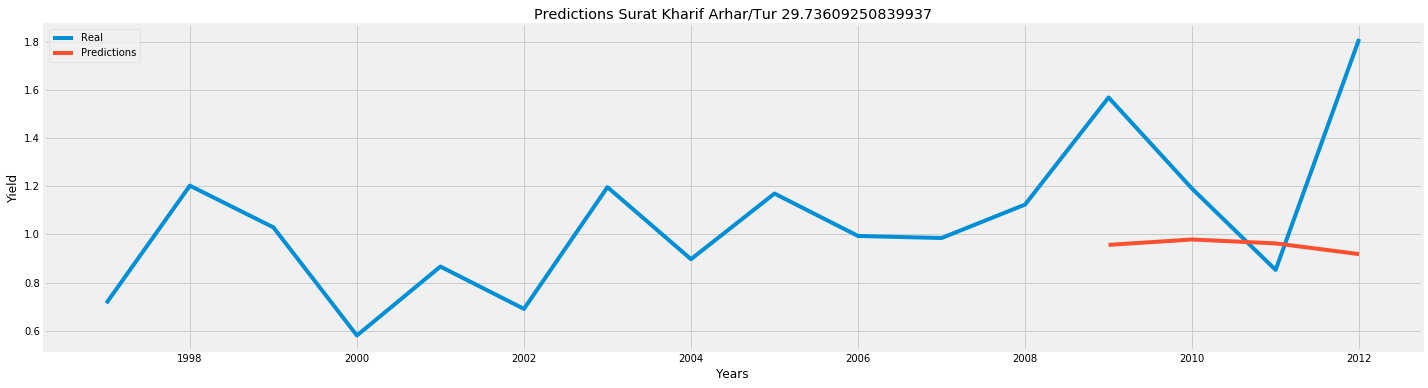

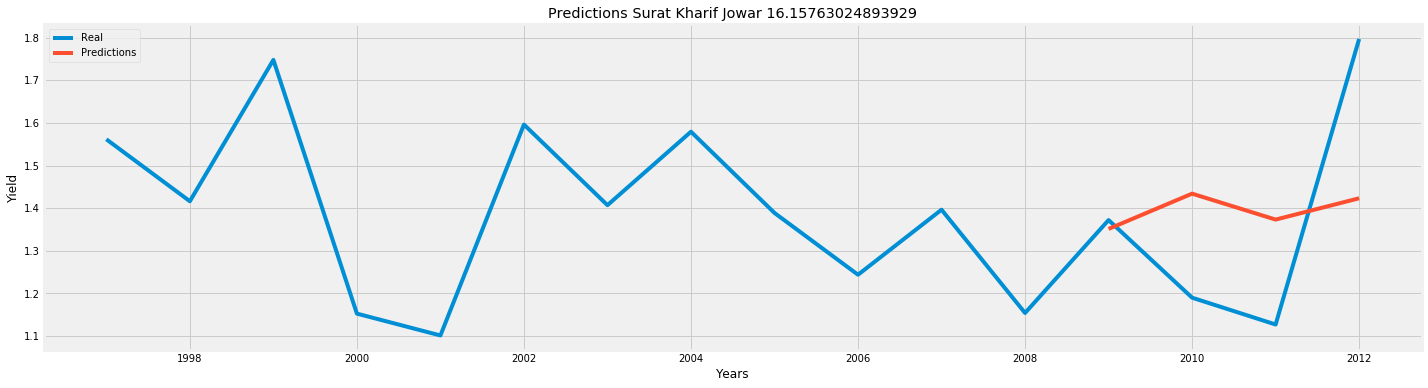

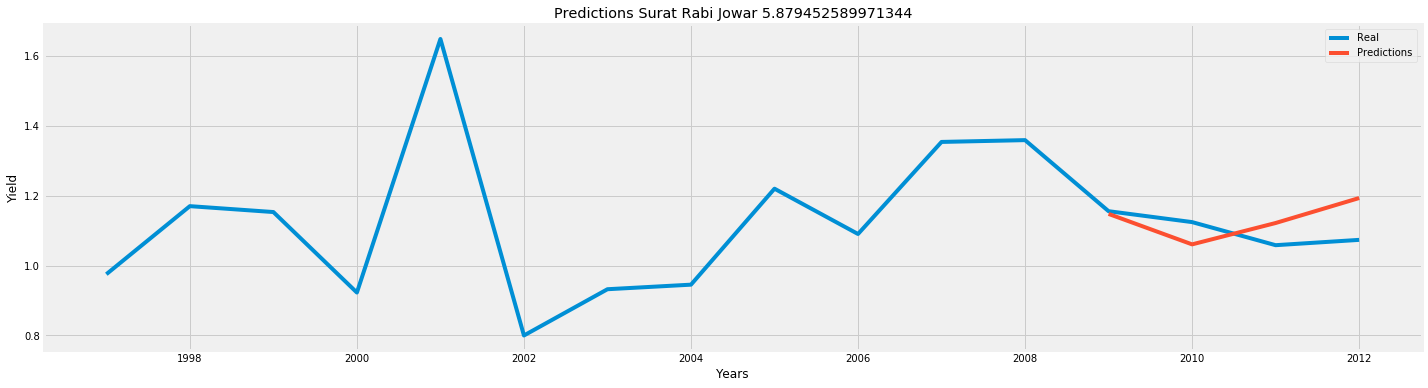

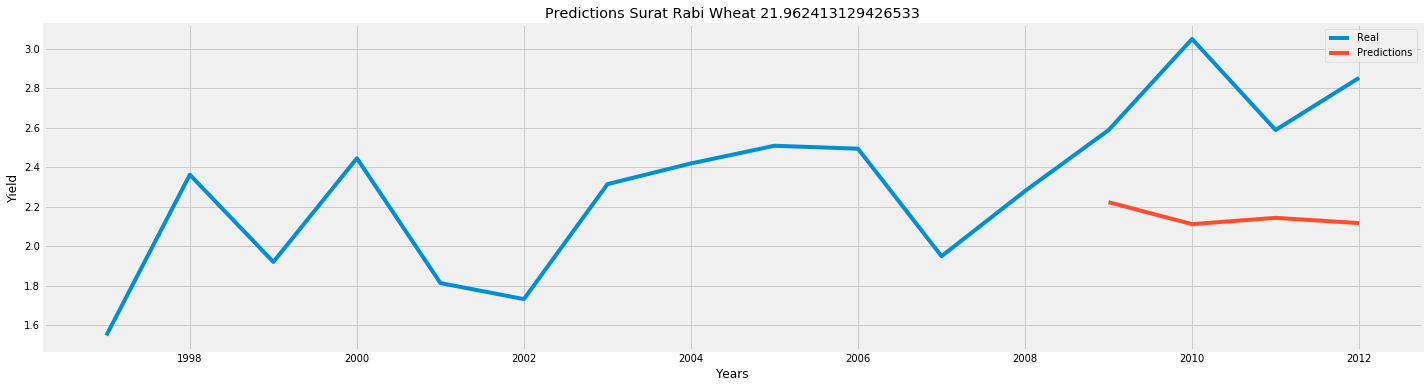

In [21]:
# Taking error=15
for city in list(df['City'].unique()):
    for season in list(df['Season'].unique()):
        for crop in list(df['Crop'].unique()):
            try:
                df_1=dataset(df,City=city,Season=season,Crop=crop)
                X_train, X_test, y_train, y_test = test_train_split(df_1)
                number=best_pca_components(X_train)
            ## Performing standardization before applying PCA
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.fit_transform(X_test)

                pca = PCA(n_components=number)
                X_train_pca = pca.fit_transform(X_train)
                X_test_pca = pca.transform(X_test)
        
                model = LinearRegression()
                model.fit(X_train_pca, y_train)
                predictions=model.predict(X_test_pca)
                error=mean_absolute_percentage_error(y_test,predictions)
                plt.figure(figsize=(22,6))
                plt.plot(df_1.index,df_1['Yield'],label='Real')
                plt.plot(y_test.index,predictions,label='Predictions')
                plt.ylabel('Yield')
                plt.xlabel('Years')
                plt.title('Predictions '+str(city)+" "+str(season)+" "+str(crop)+" "+str(mean_absolute_percentage_error(y_test,predictions)))
                plt.legend()
                plt.show()
            except:
                continue

# Lasso Regression

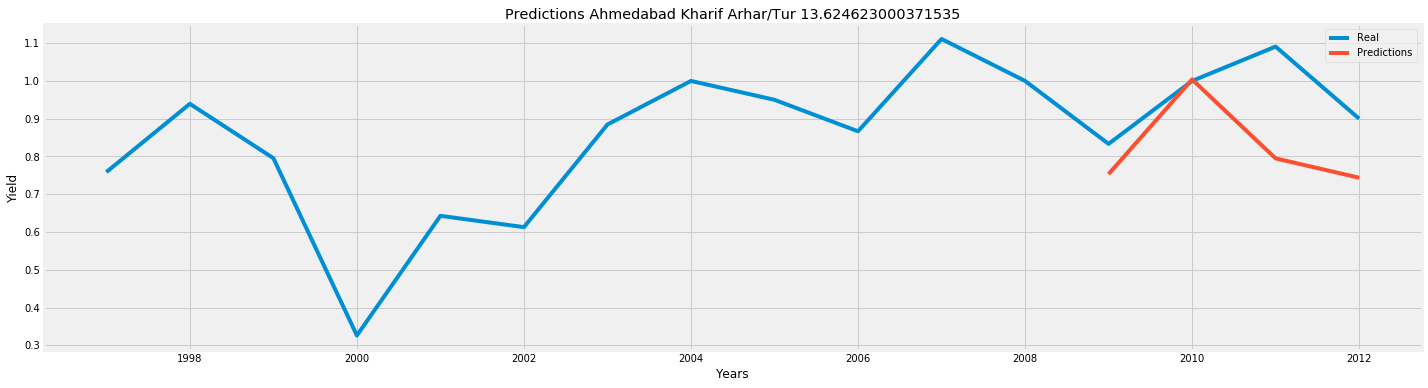

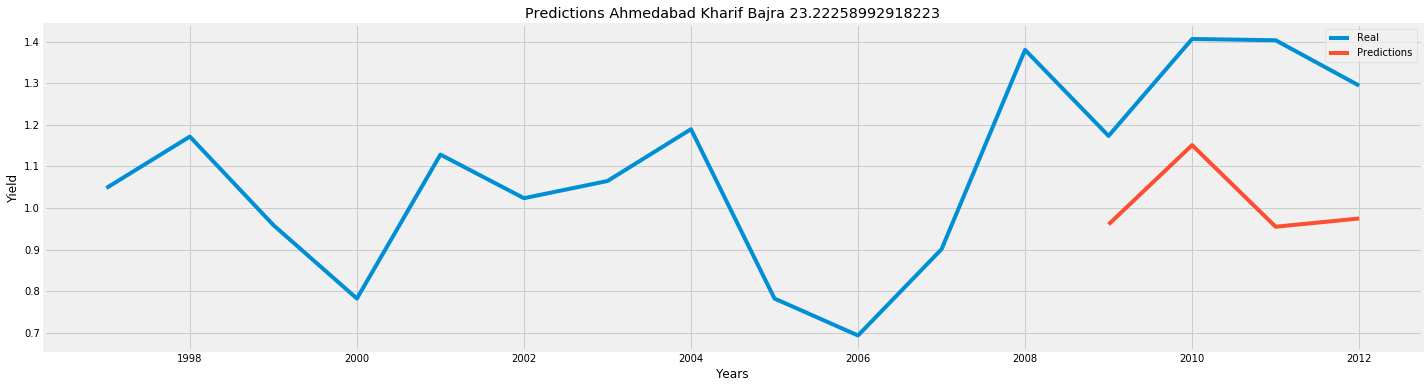

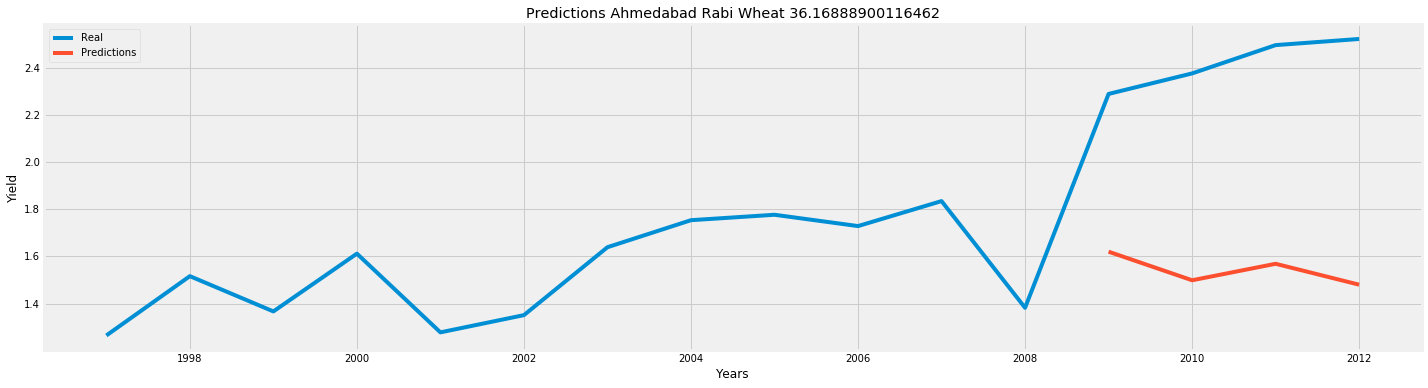

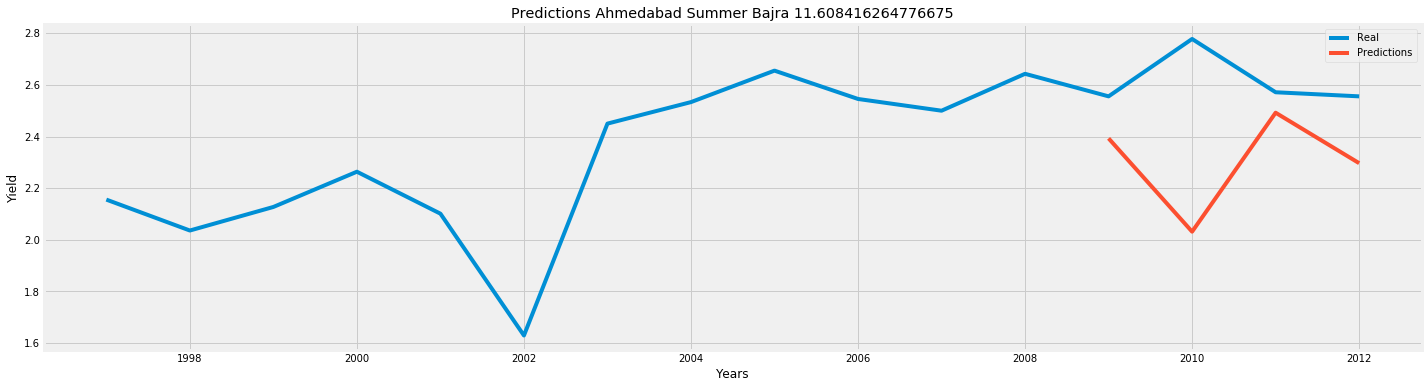

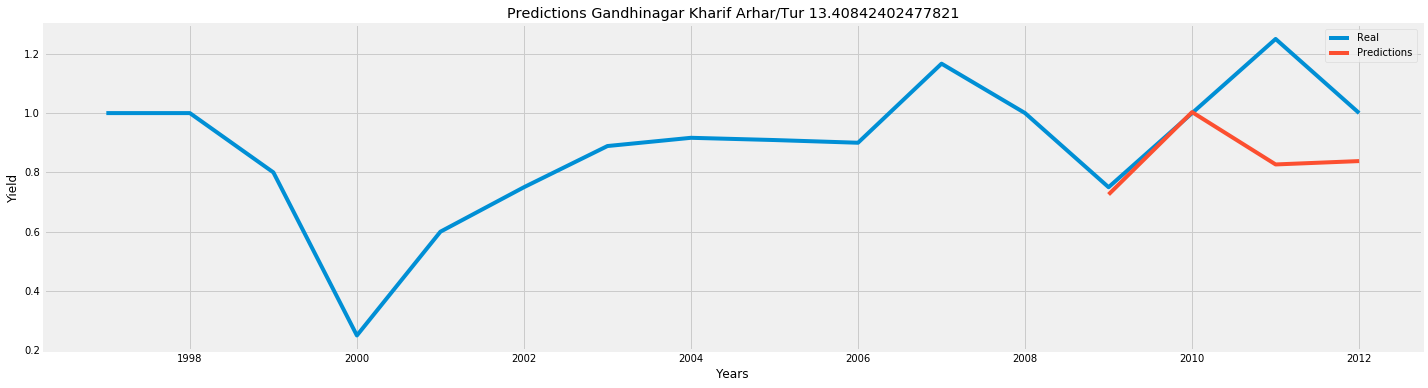

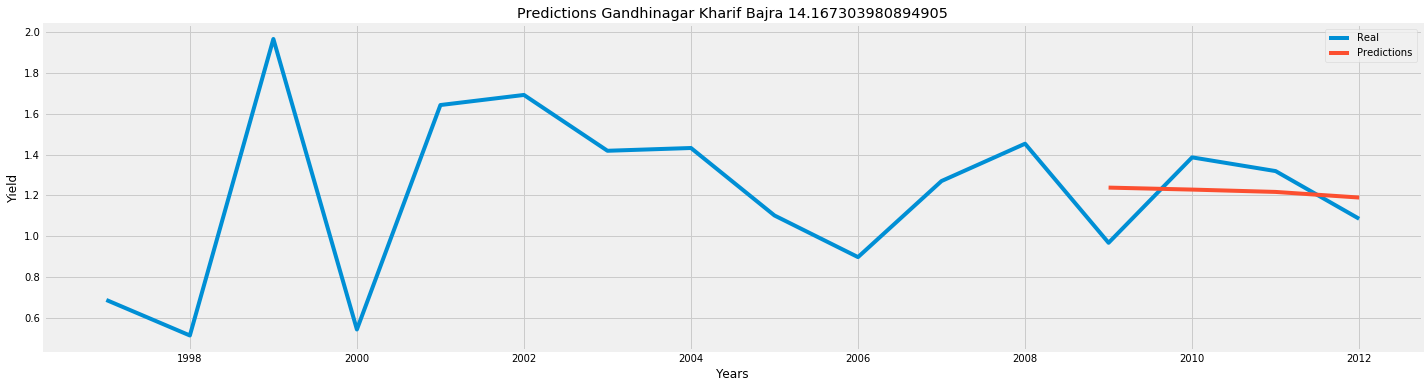

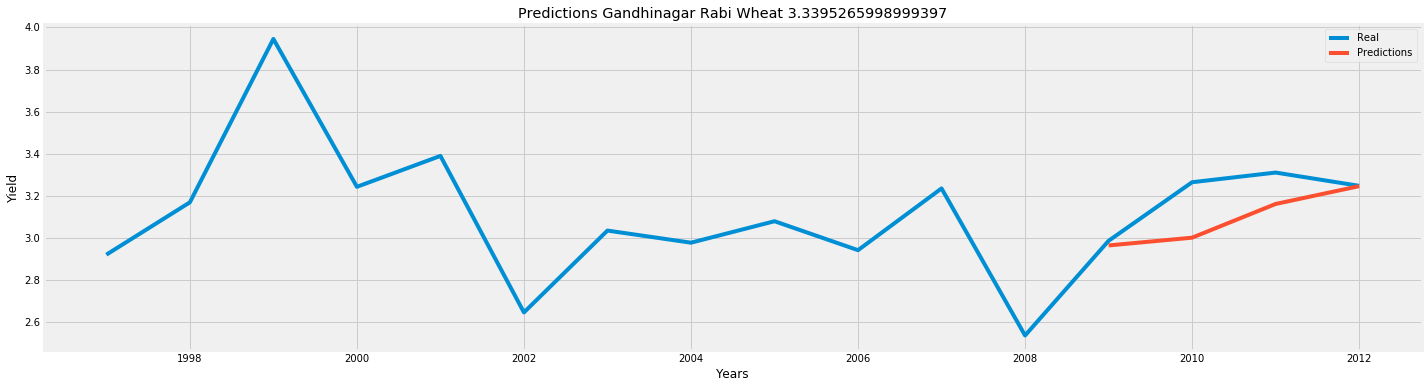

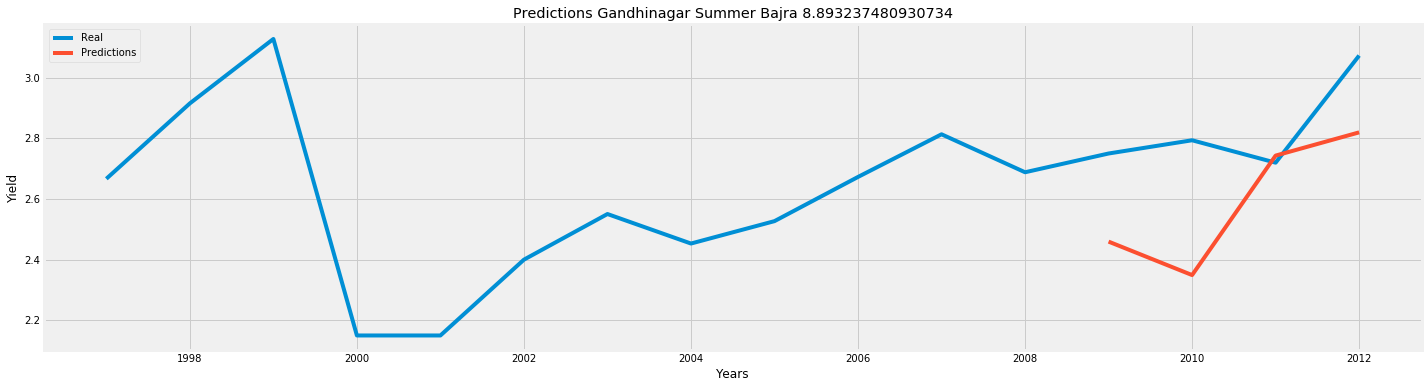

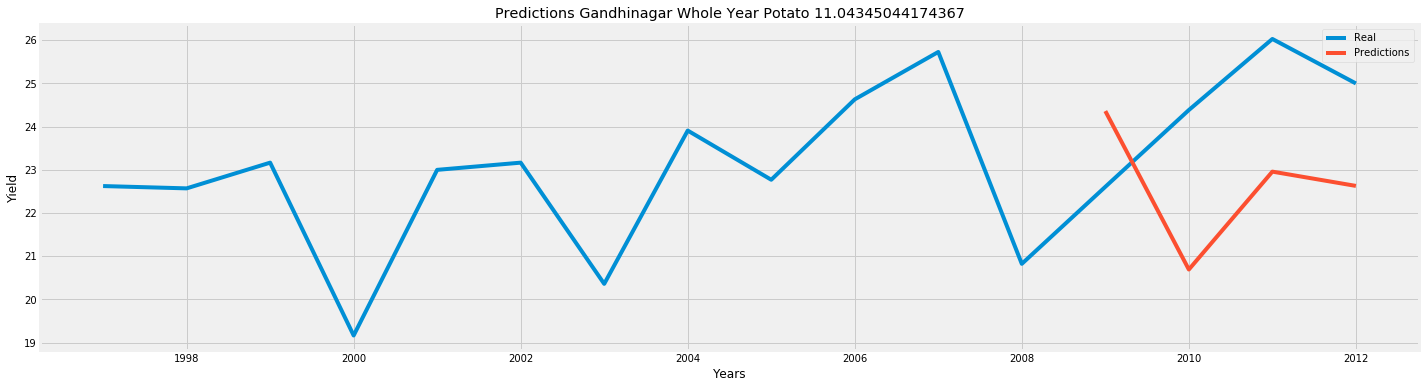

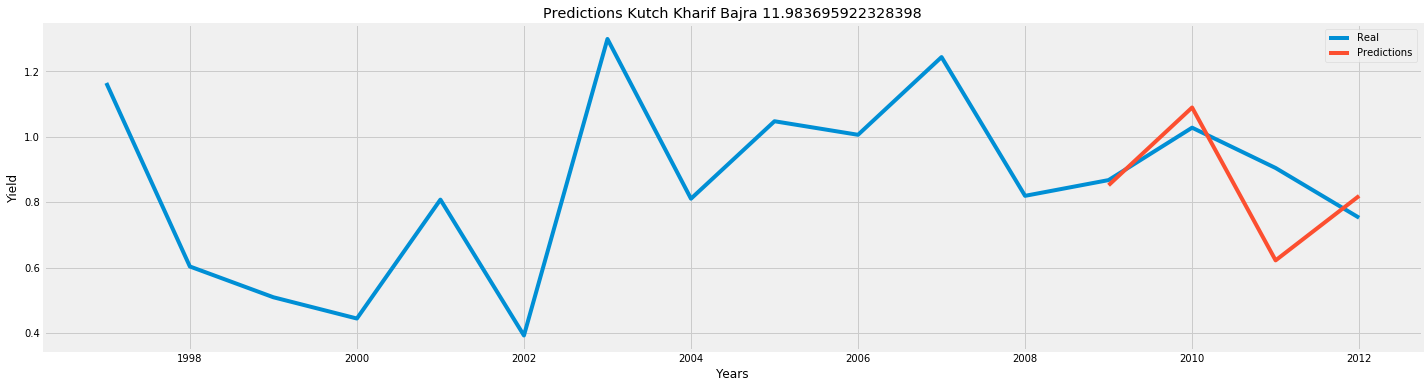

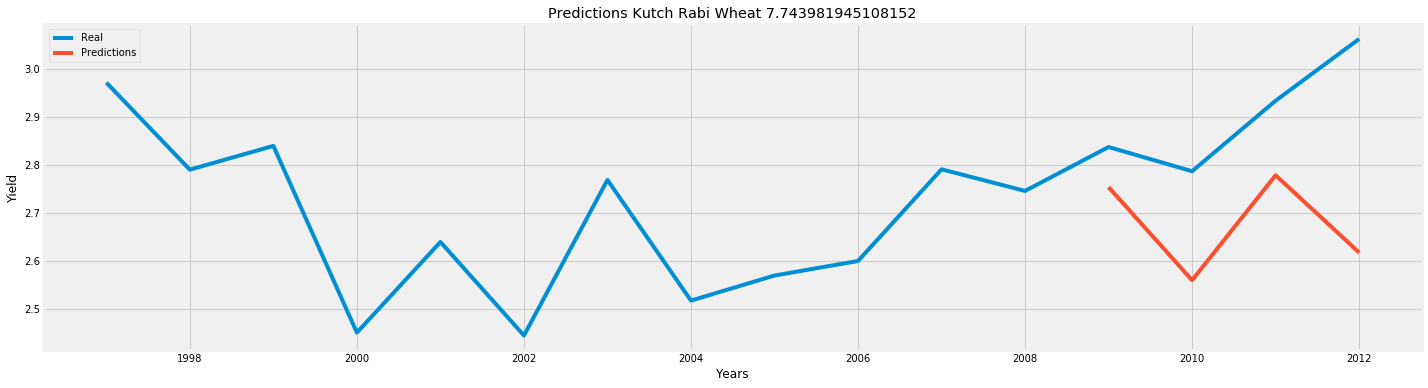

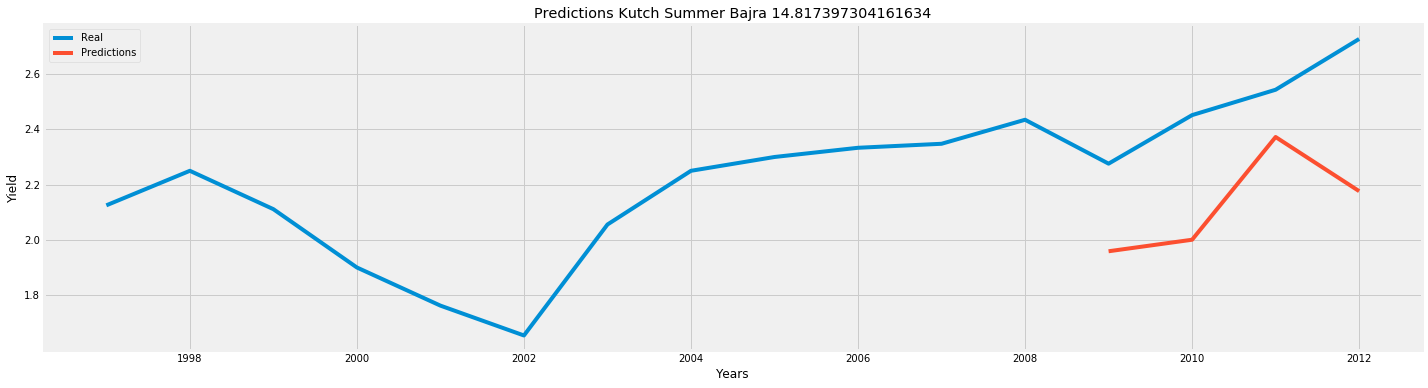

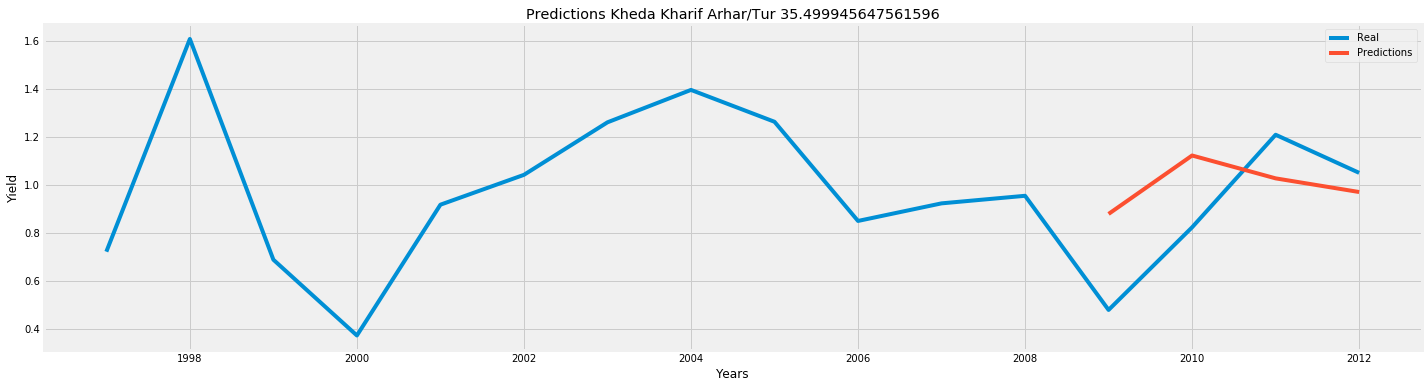

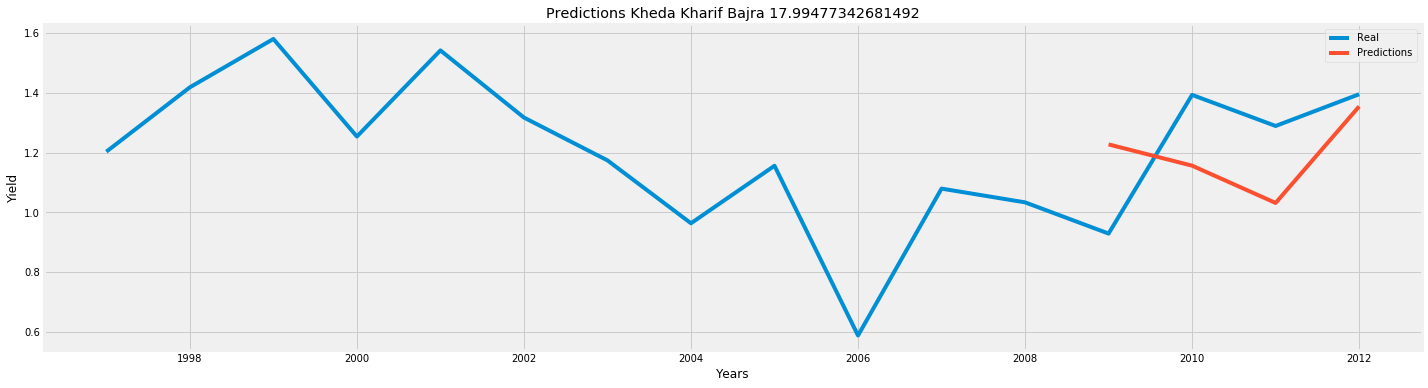

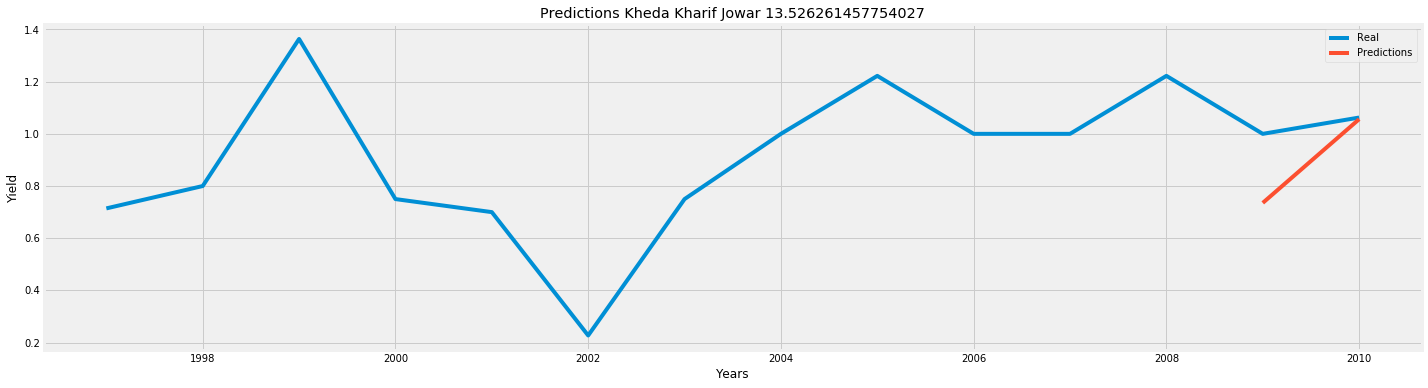

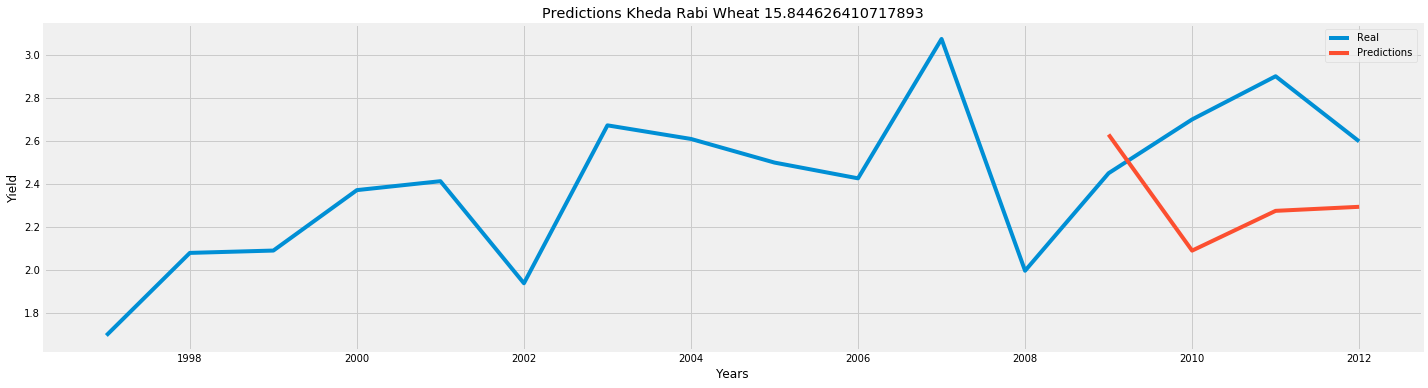

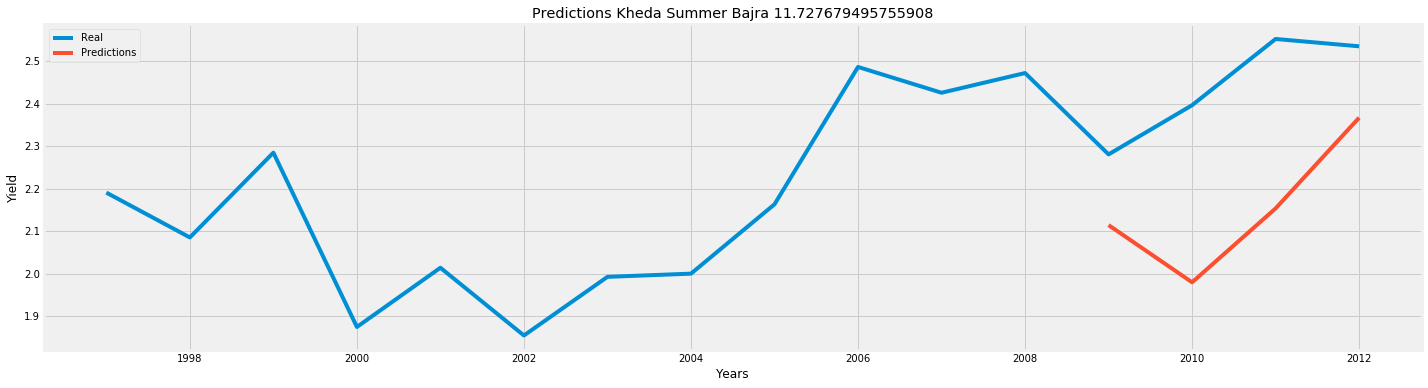

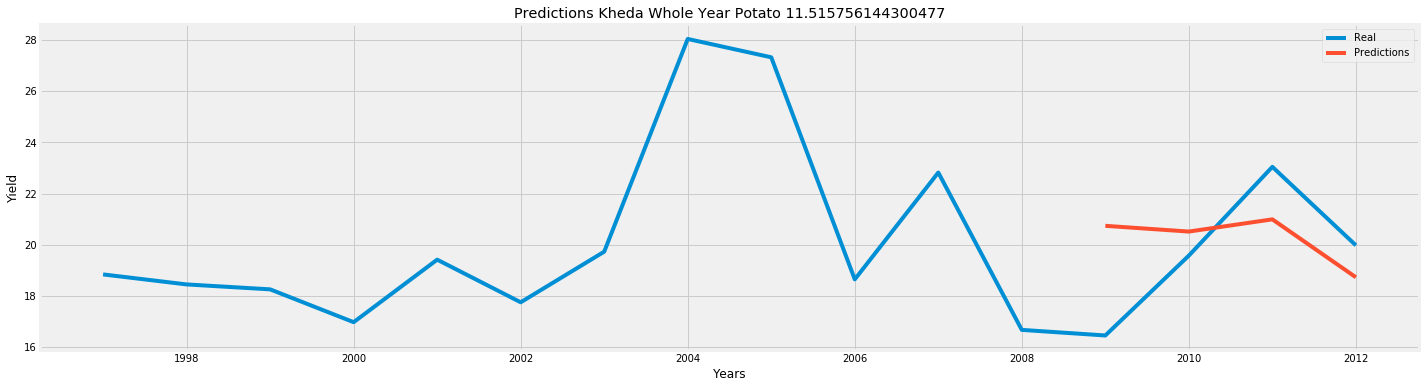

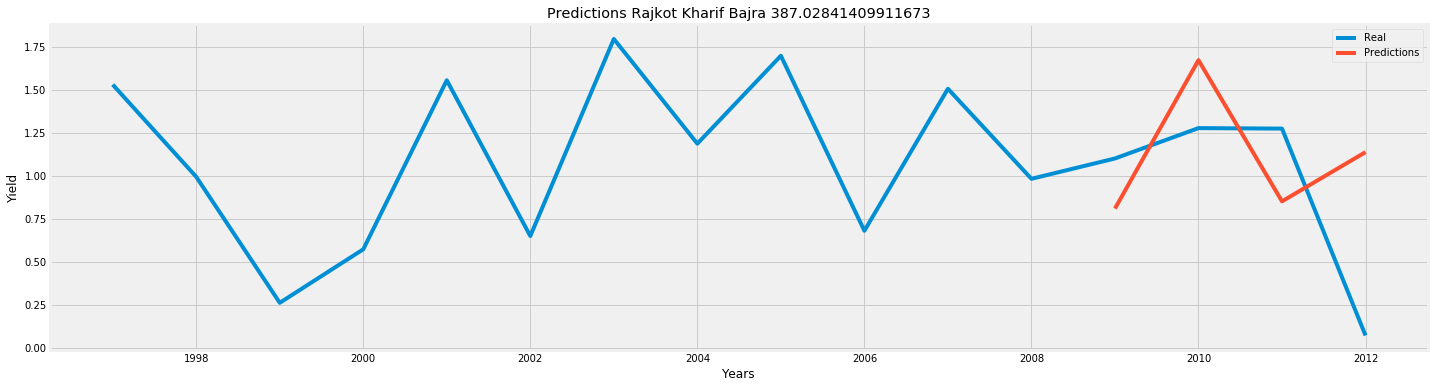

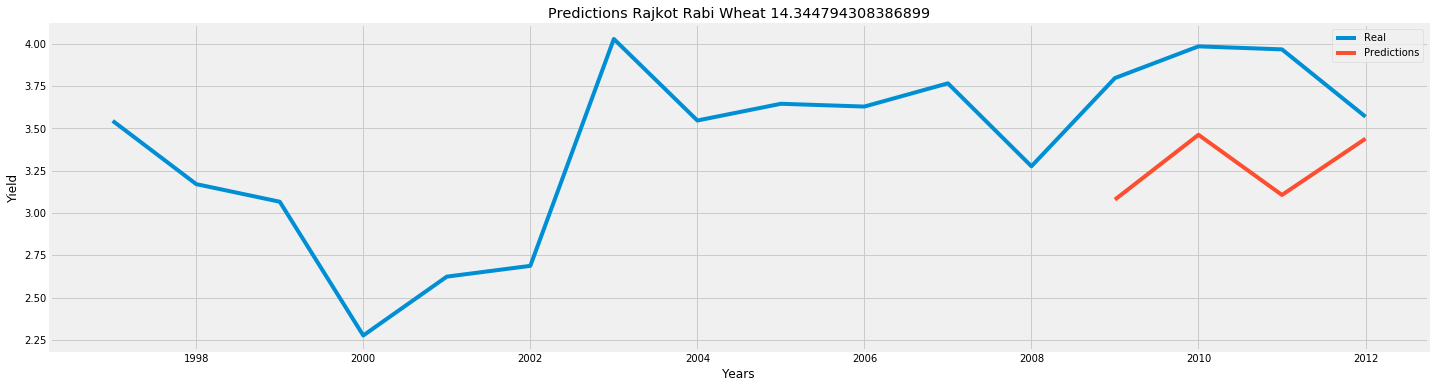

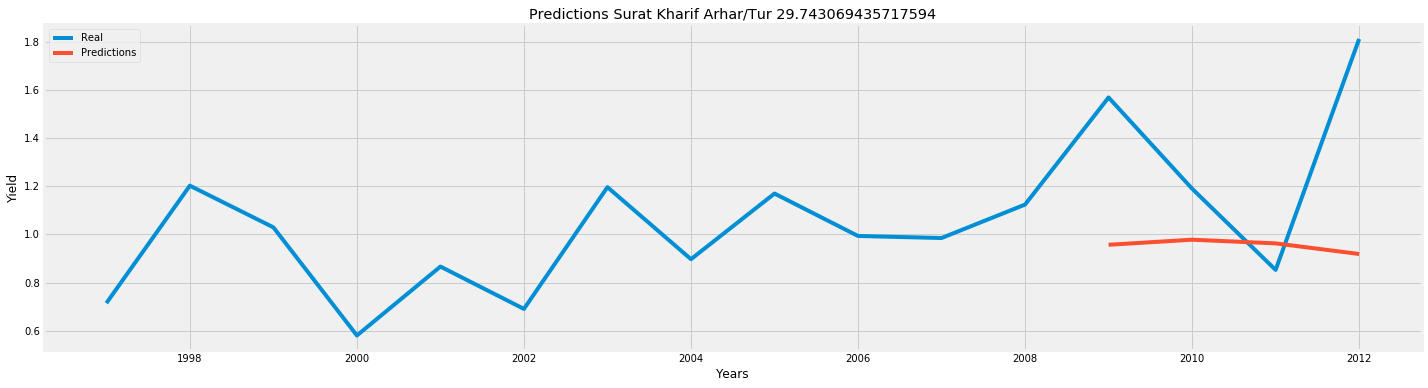

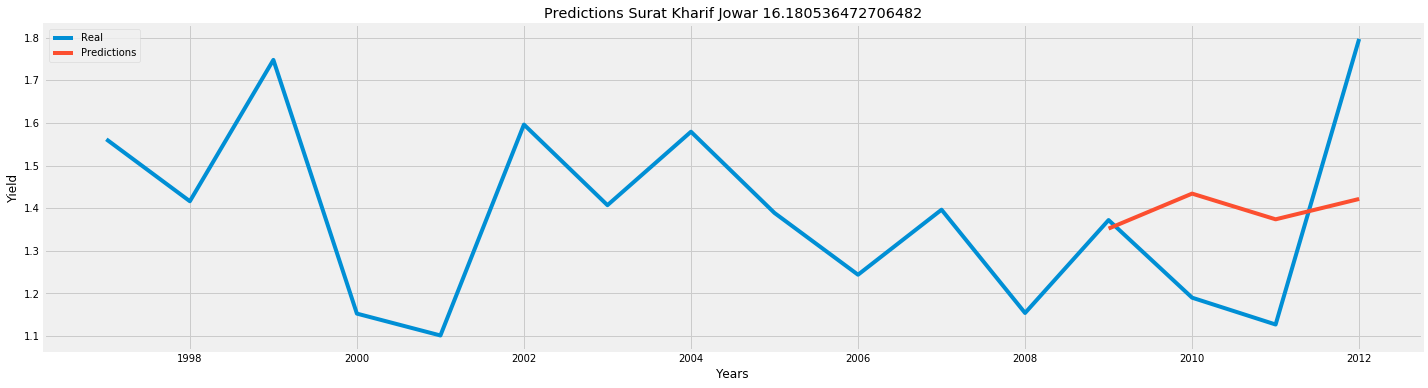

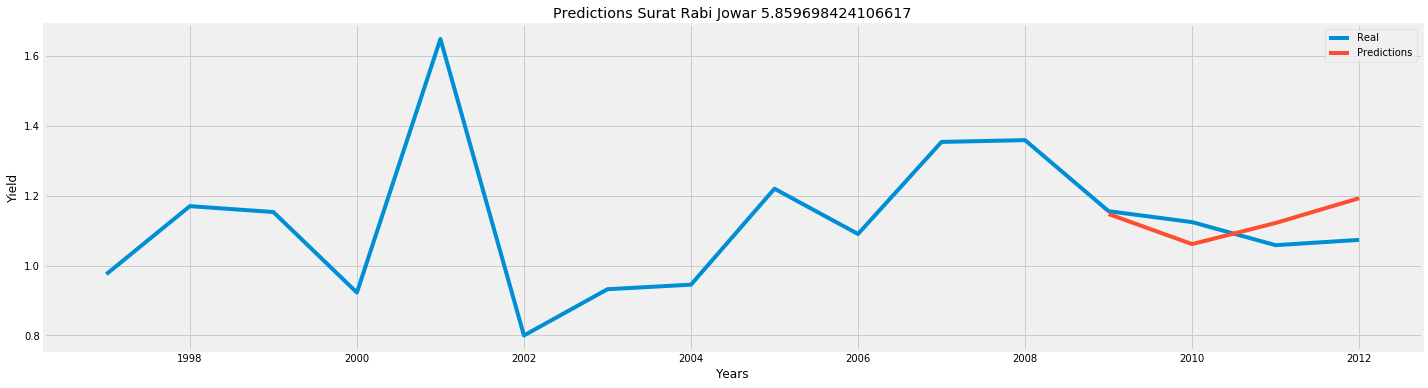

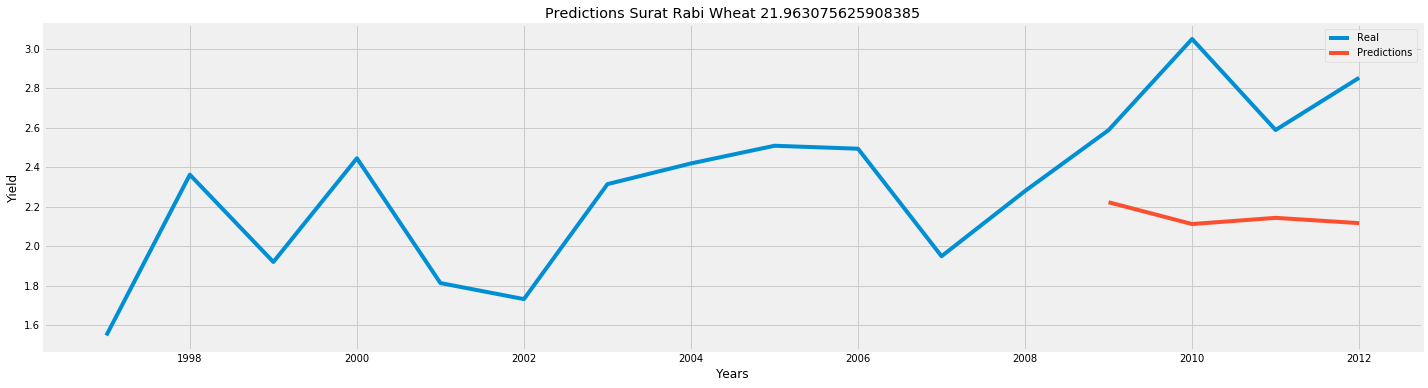

In [22]:
# Taking error=15
for city in list(df['City'].unique()):
    for season in list(df['Season'].unique()):
        for crop in list(df['Crop'].unique()):
            try:
                df_1=dataset(df,City=city,Season=season,Crop=crop)
                X_train, X_test, y_train, y_test = test_train_split(df_1)
                number=best_pca_components(X_train)
            ## Performing standardization before applying PCA
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.fit_transform(X_test)

                pca = PCA(n_components=number)
                X_train_pca = pca.fit_transform(X_train)
                X_test_pca = pca.transform(X_test)
        
                model = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
                model.fit(X_train_pca, y_train)
                predictions=model.predict(X_test_pca)
                error=mean_absolute_percentage_error(y_test,predictions)
                plt.figure(figsize=(22,6))
                plt.plot(df_1.index,df_1['Yield'],label='Real')
                plt.plot(y_test.index,predictions,label='Predictions')
                plt.ylabel('Yield')
                plt.xlabel('Years')
                plt.title('Predictions '+str(city)+" "+str(season)+" "+str(crop)+" "+str(mean_absolute_percentage_error(y_test,predictions)))
                plt.legend()
                plt.show()
            except:
                continue

# Support Vector Regression(Grid)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.5s finished


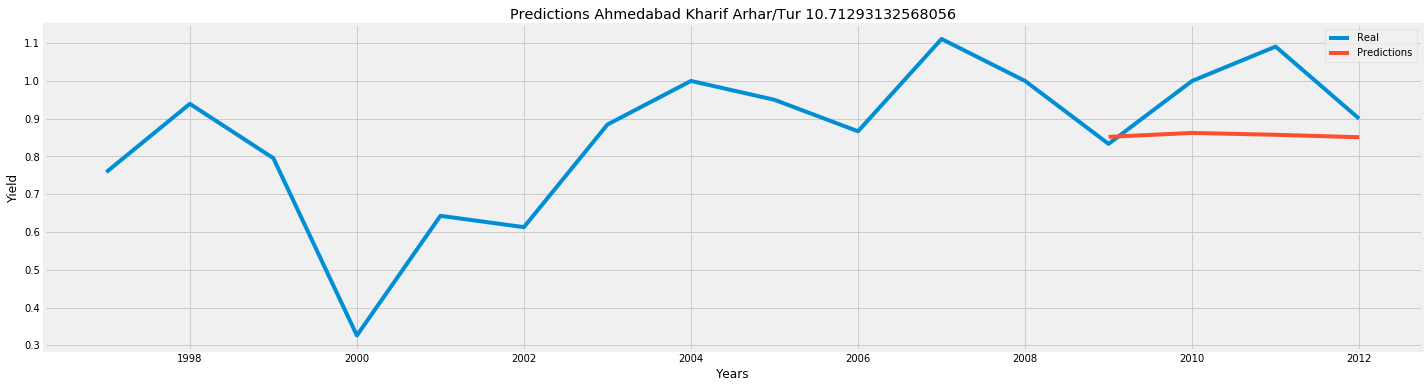

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.8s finished


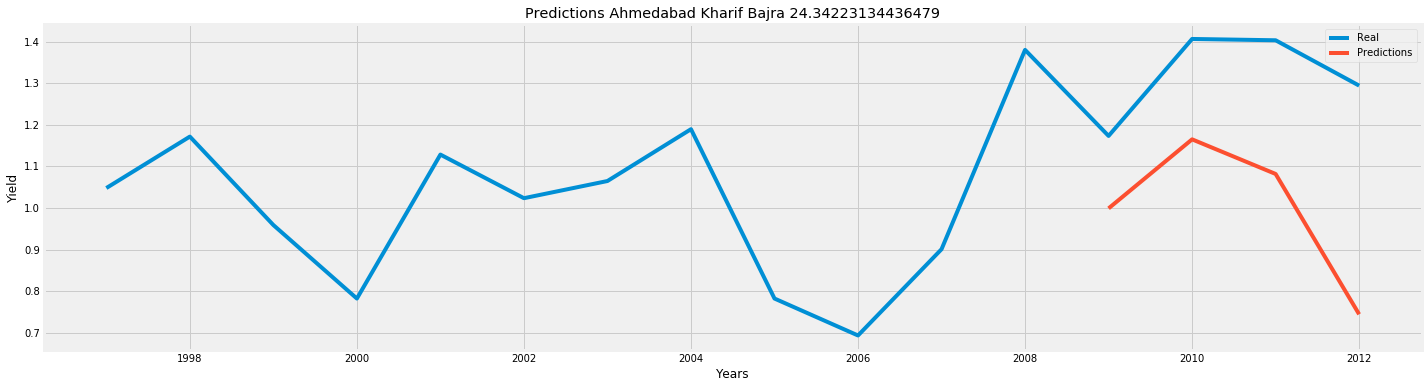

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.6s finished


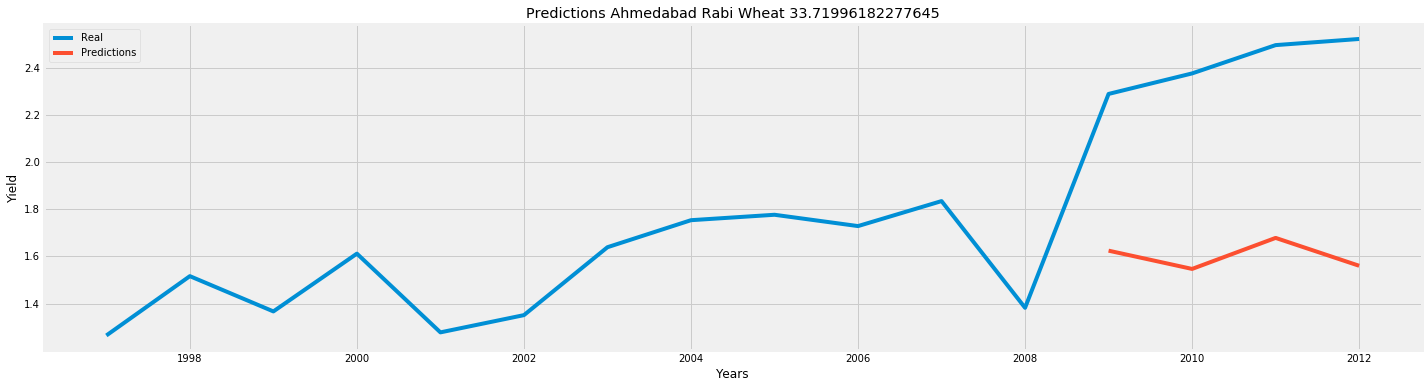

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.0s finished


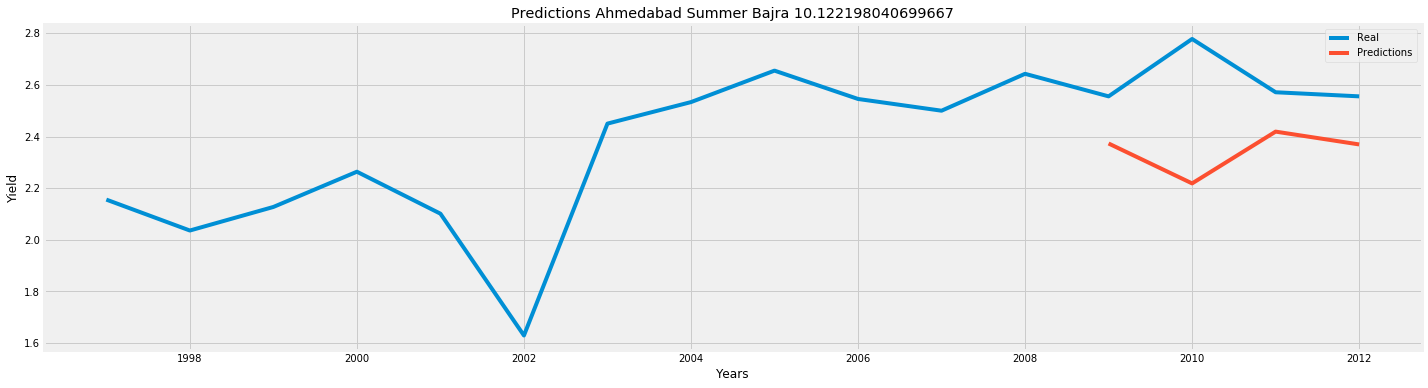

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.6s finished


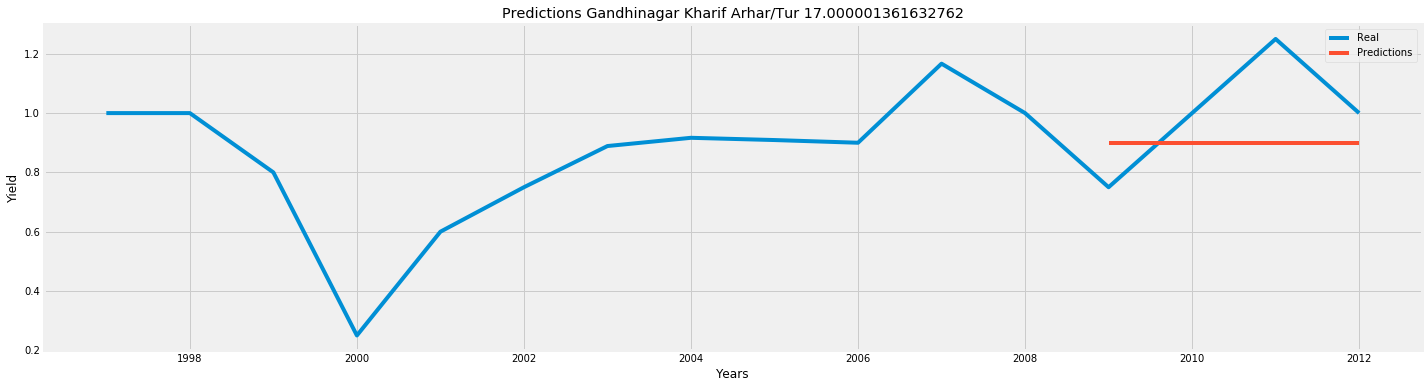

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.7s finished


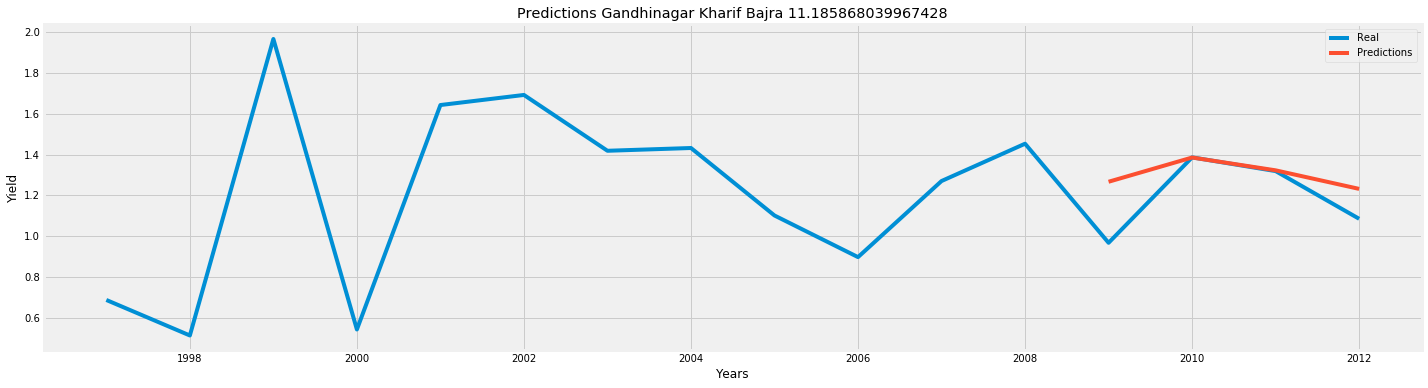

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.8s finished


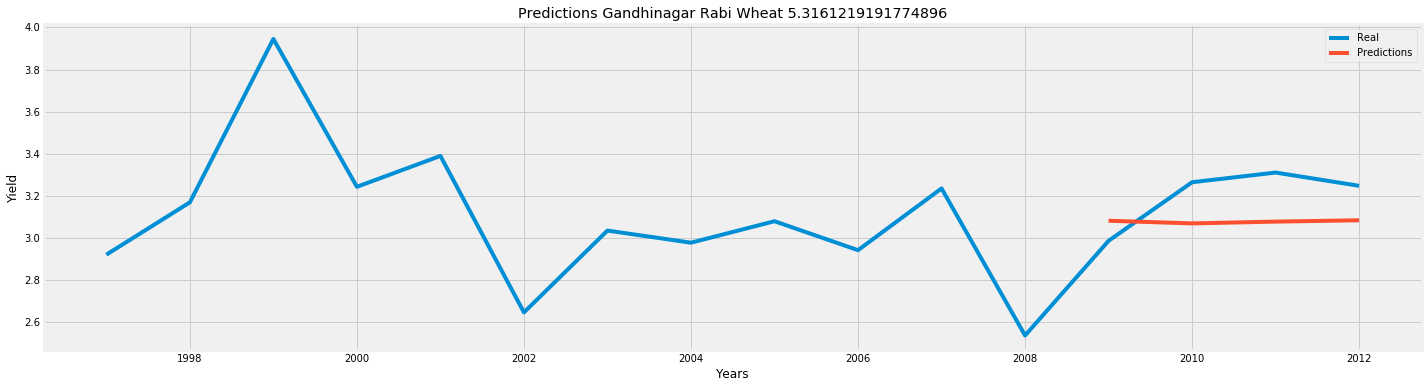

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.7s finished


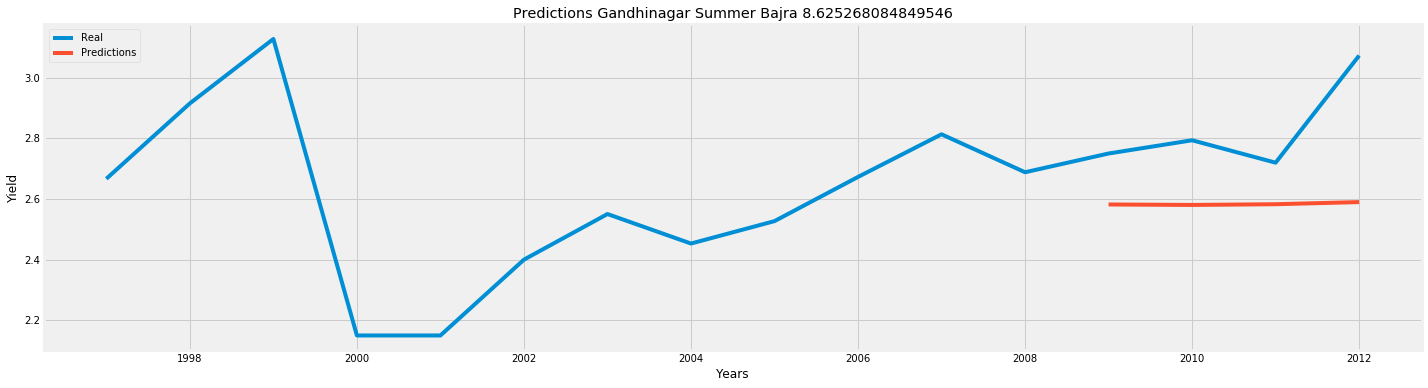

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.6s finished


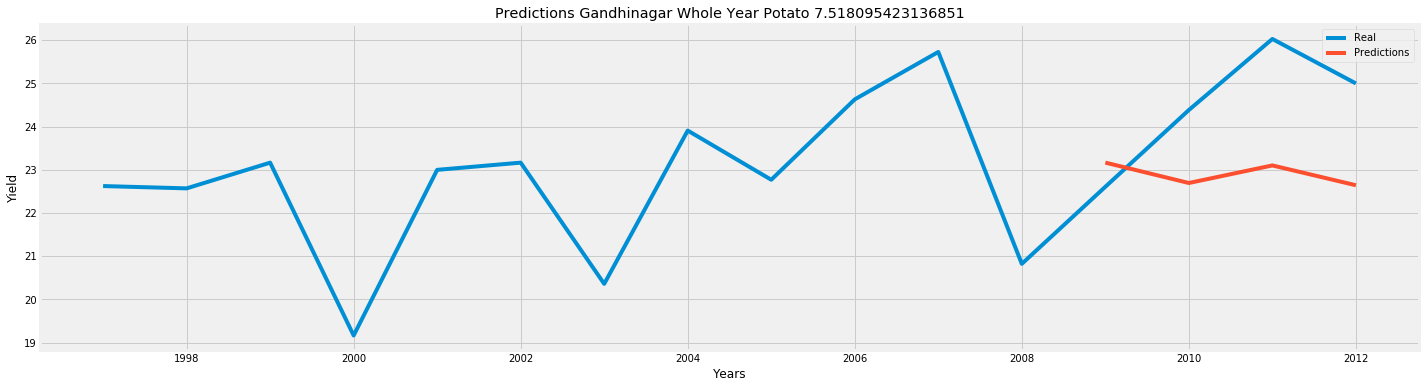

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.6s finished


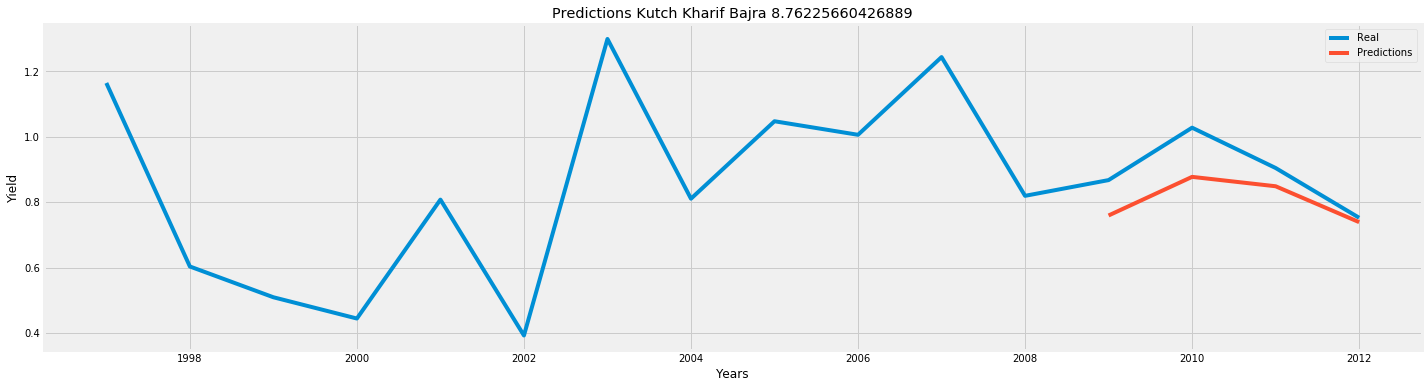

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.7s finished


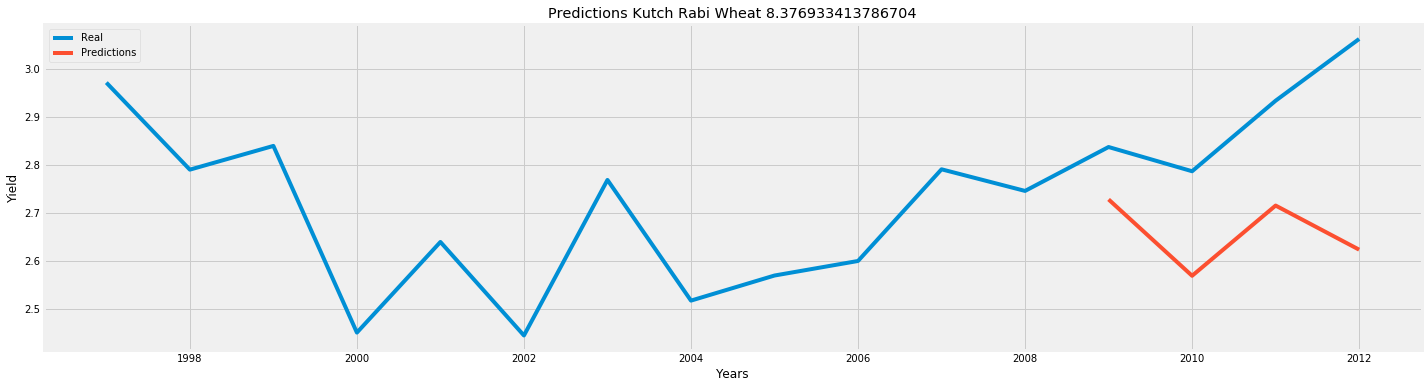

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.9s finished


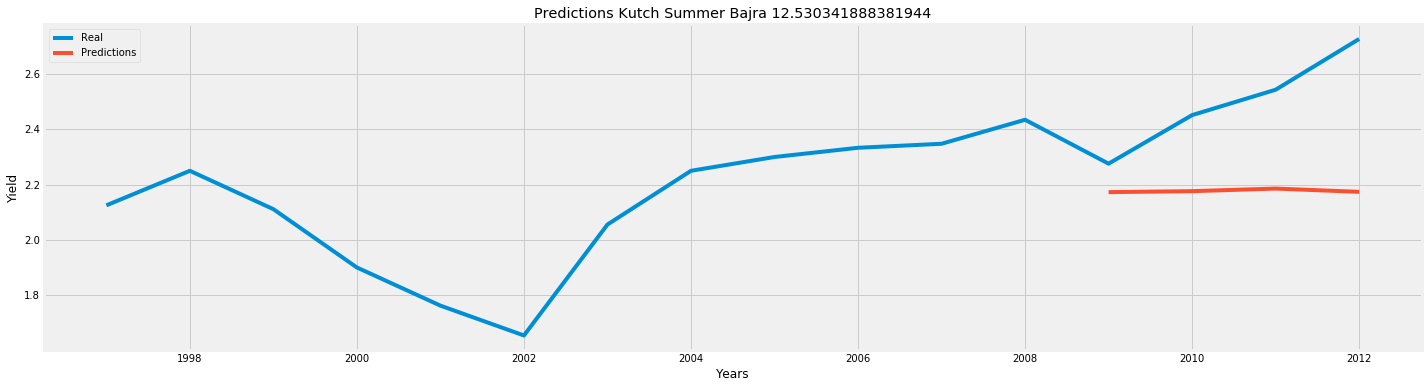

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.4s finished


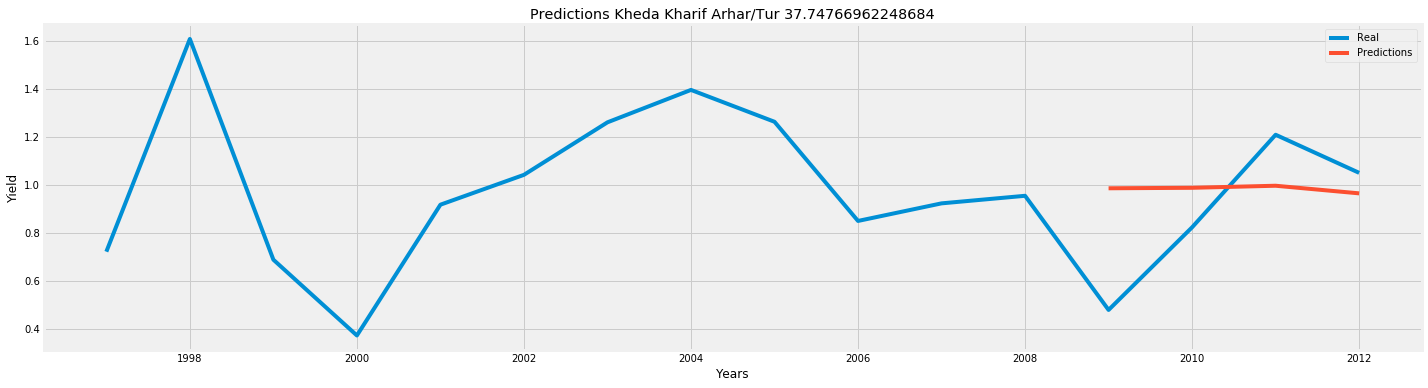

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.7s finished


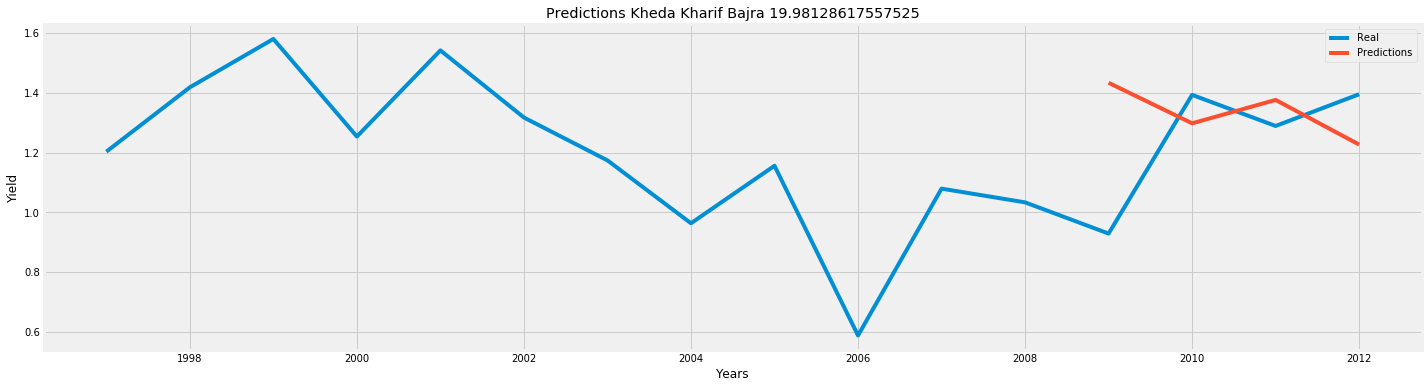

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.5s finished


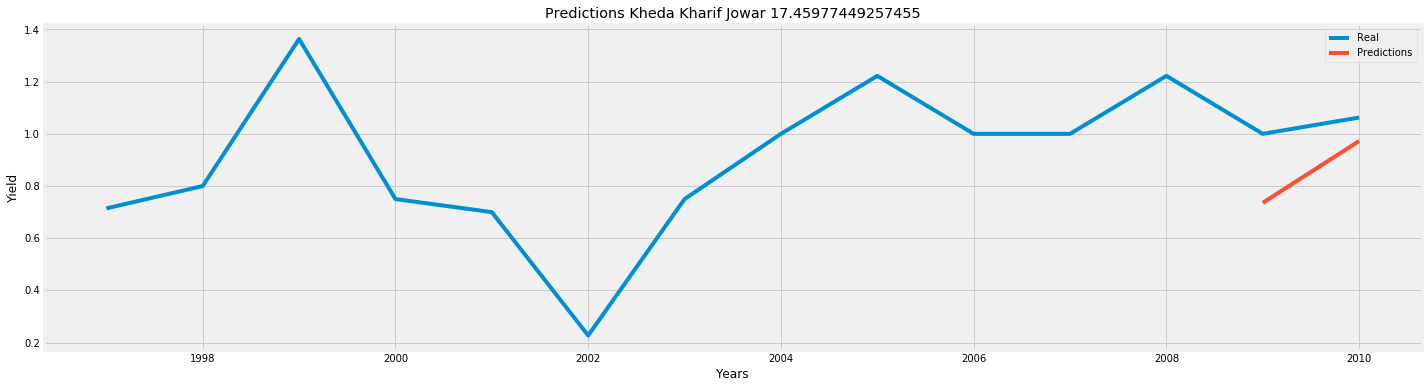

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.6s finished


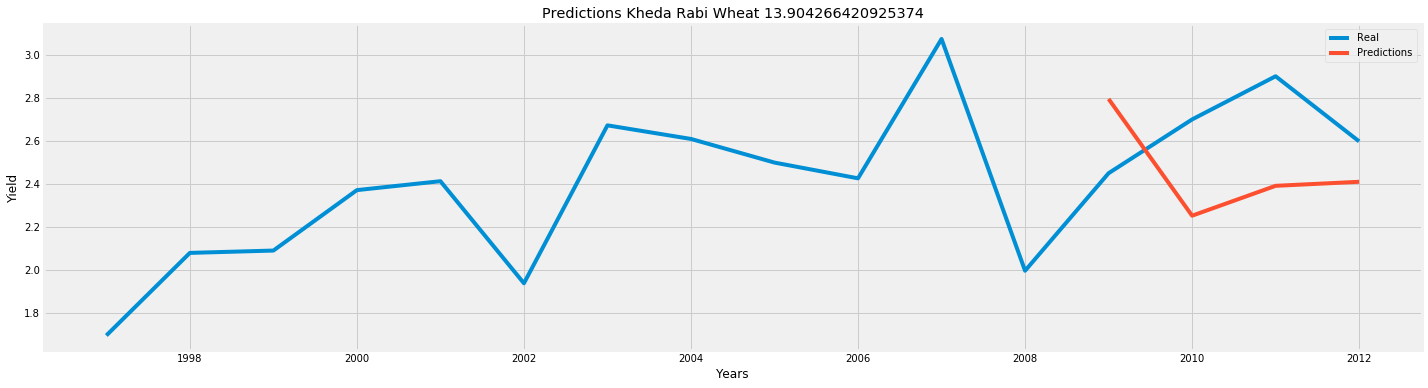

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.0s finished


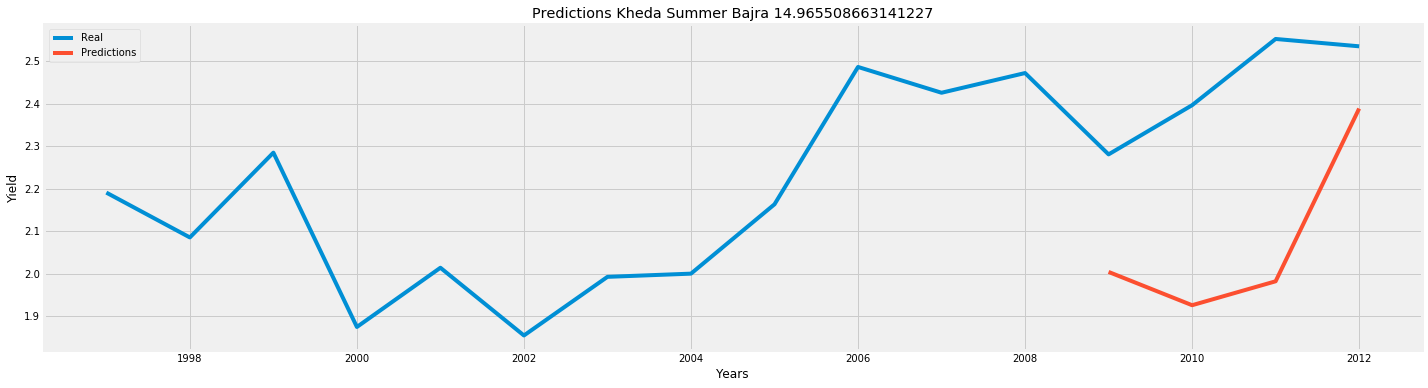

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.2s finished


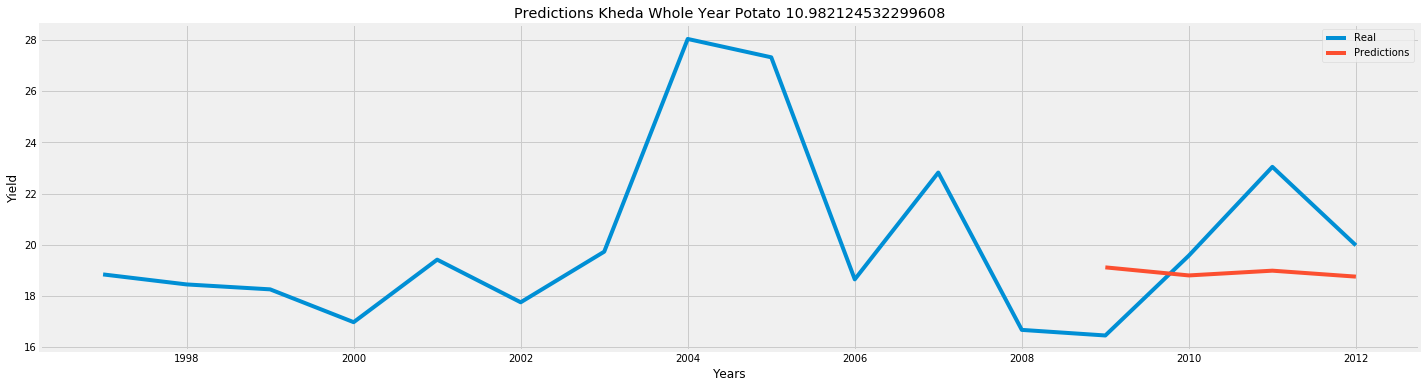

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    3.3s finished


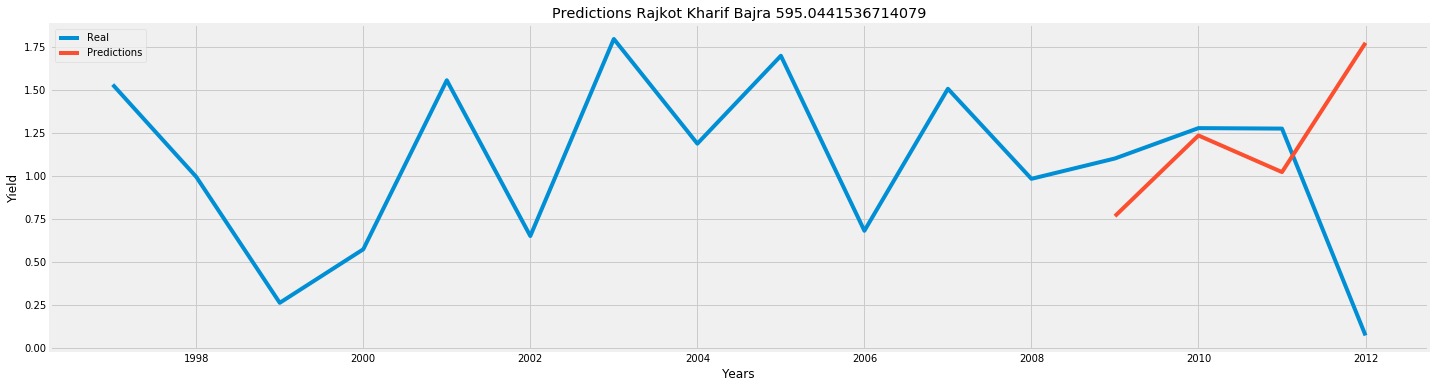

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.7s finished


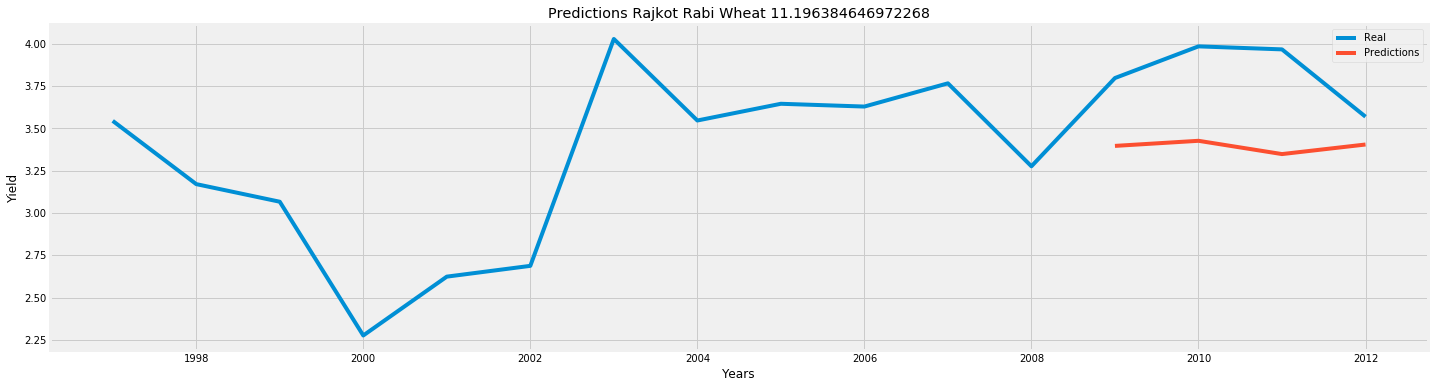

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    1.7s finished


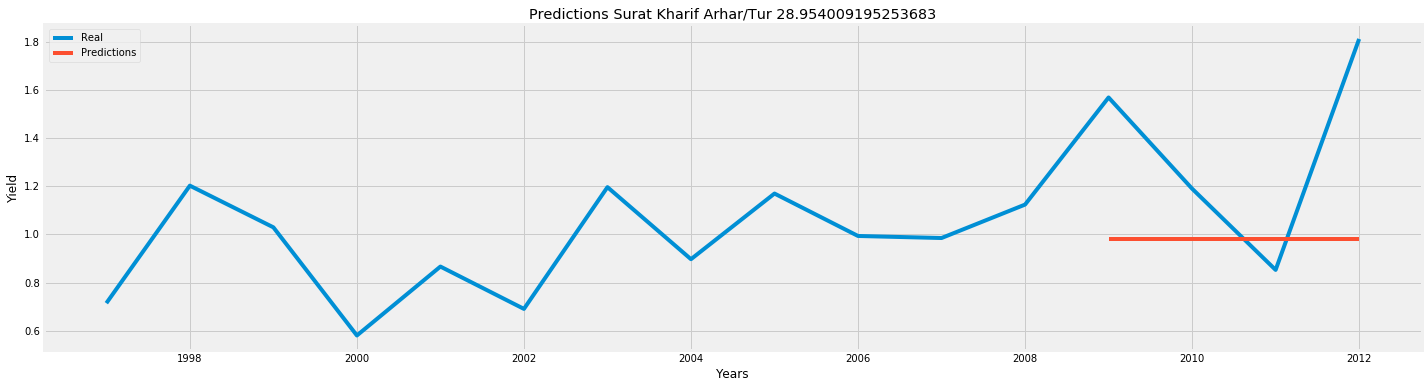

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.1s finished


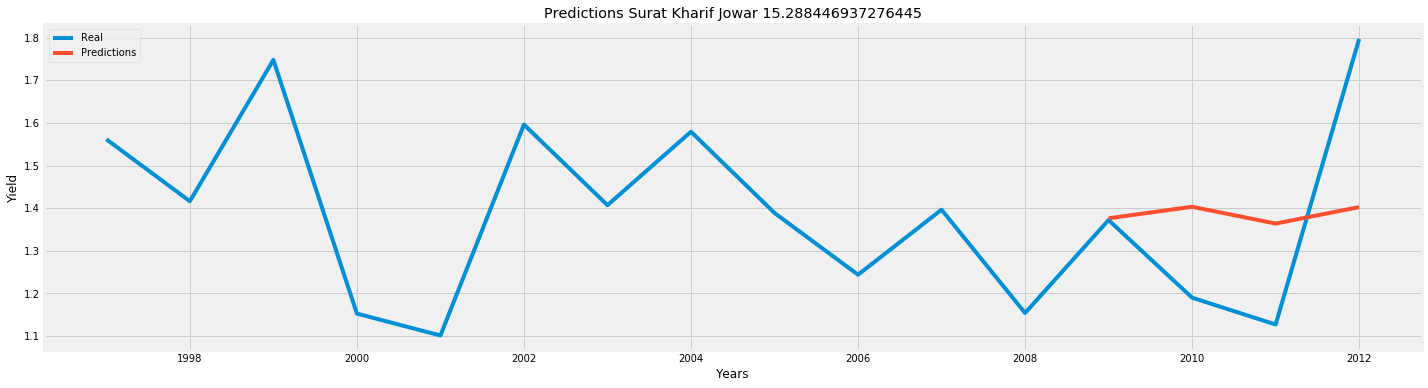

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.0s finished


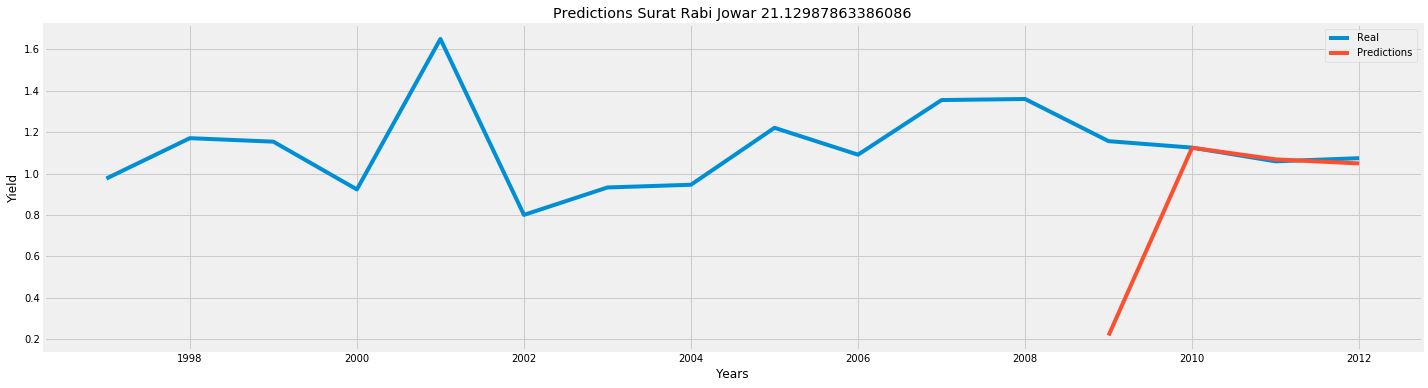

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed:    2.0s finished


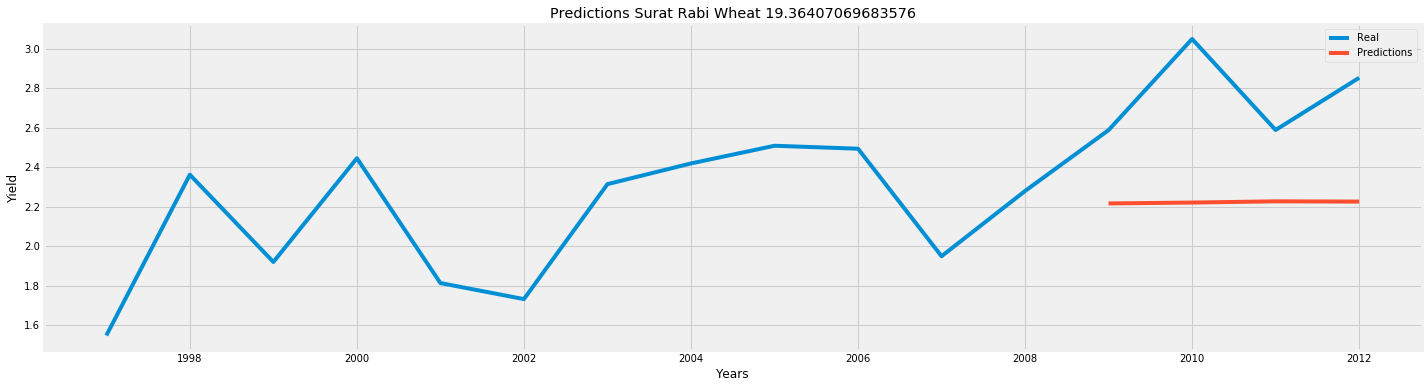

In [24]:
# Taking error=15
for city in list(df['City'].unique()):
    for season in list(df['Season'].unique()):
        for crop in list(df['Crop'].unique()):
            try:
                df_1=dataset(df,City=city,Season=season,Crop=crop)
                X_train, X_test, y_train, y_test = test_train_split(df_1)
                number=best_pca_components(X_train)
            ## Performing standardization before applying PCA
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.fit_transform(X_test)

                pca = PCA(n_components=number)
                X_train_pca = pca.fit_transform(X_train)
                X_test_pca = pca.transform(X_test)
                
                param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
                  'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
                  'kernel': ['rbf', 'poly', 'linear']} 
        
                model = GridSearchCV(SVR(), param_grid, refit=True, verbose=1, cv=5, iid=True)
                model.fit(X_train_pca, y_train)
                predictions=model.predict(X_test_pca)
                error=mean_absolute_percentage_error(y_test,predictions)
                plt.figure(figsize=(22,6))
                plt.plot(df_1.index,df_1['Yield'],label='Real')
                plt.plot(y_test.index,predictions,label='Predictions')
                plt.ylabel('Yield')
                plt.xlabel('Years')
                plt.title('Predictions '+str(city)+" "+str(season)+" "+str(crop)+" "+str(mean_absolute_percentage_error(y_test,predictions)))
                plt.legend()
                plt.show()
            except:
                continue

# Random Forest

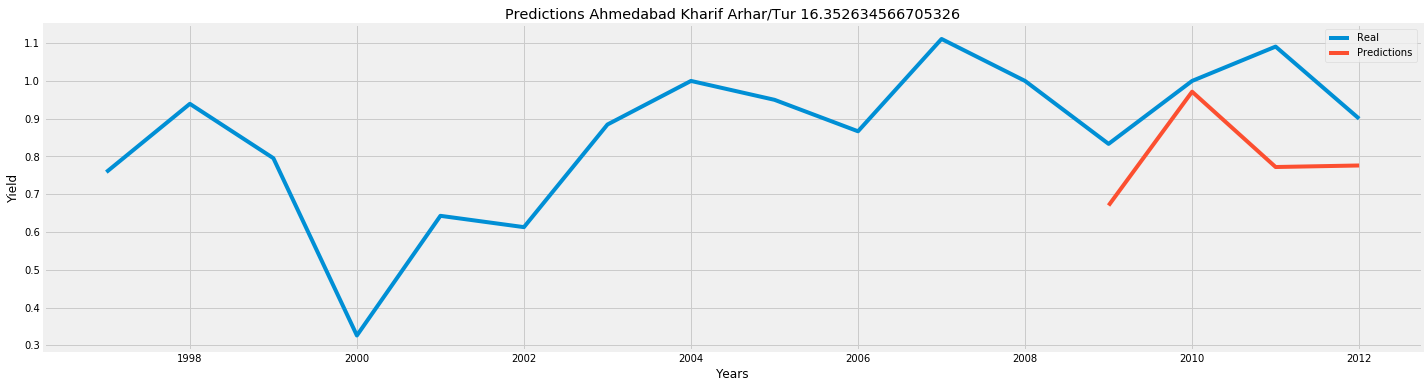

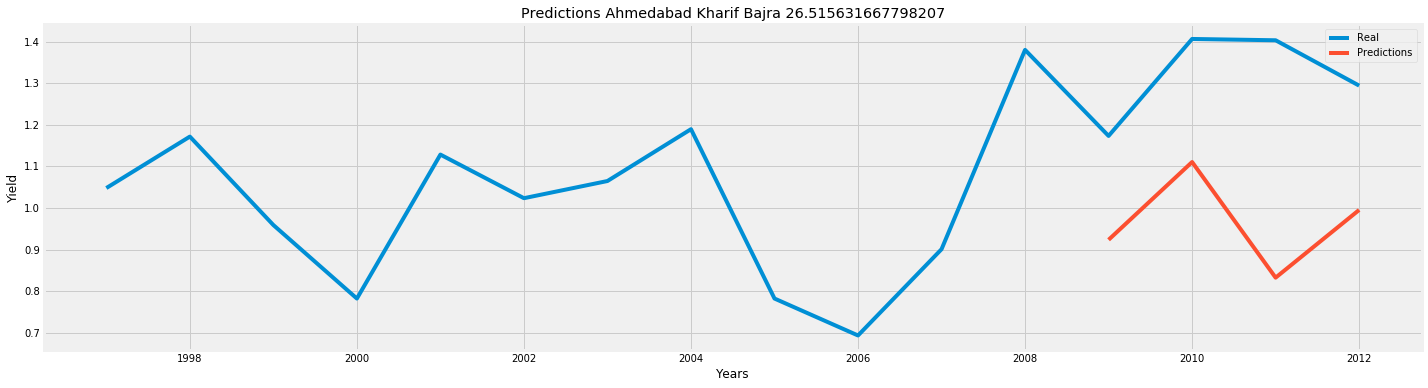

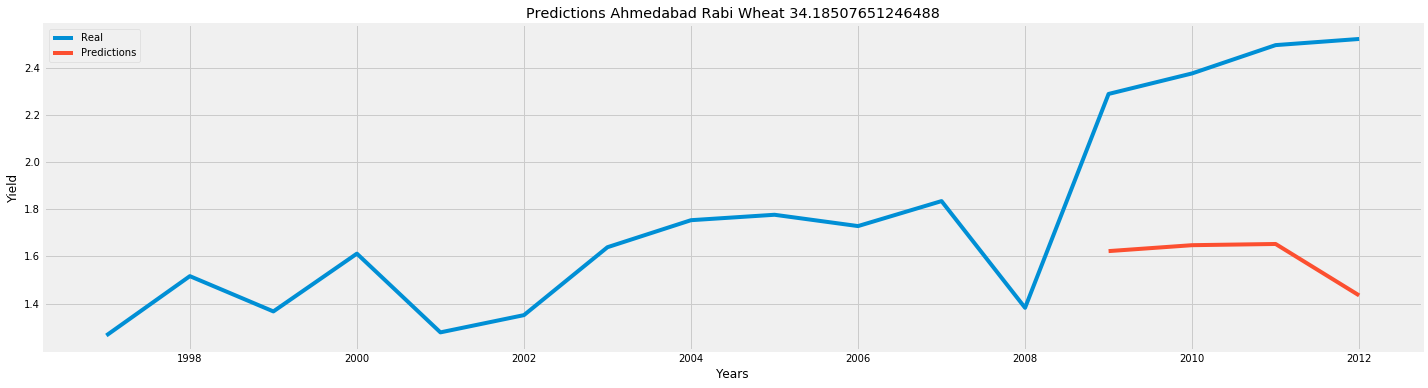

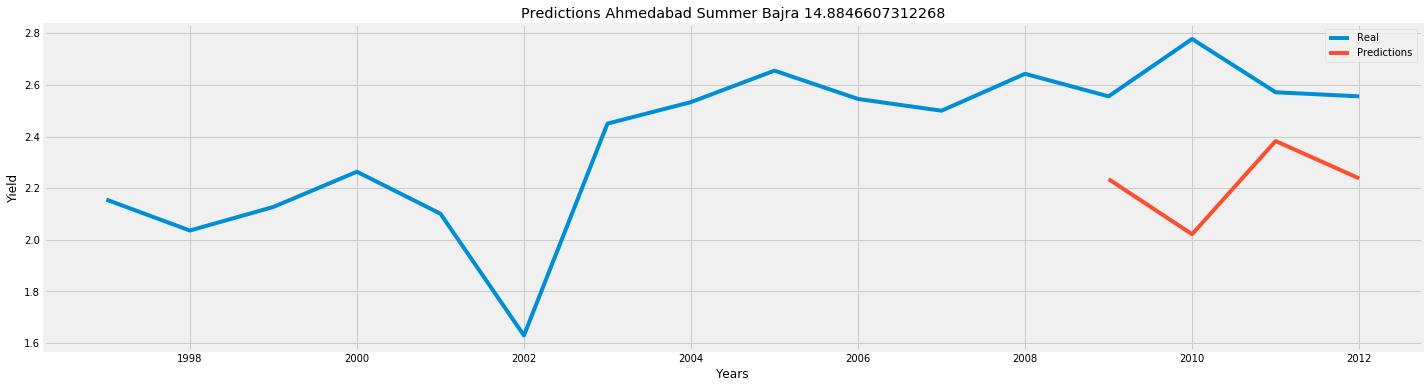

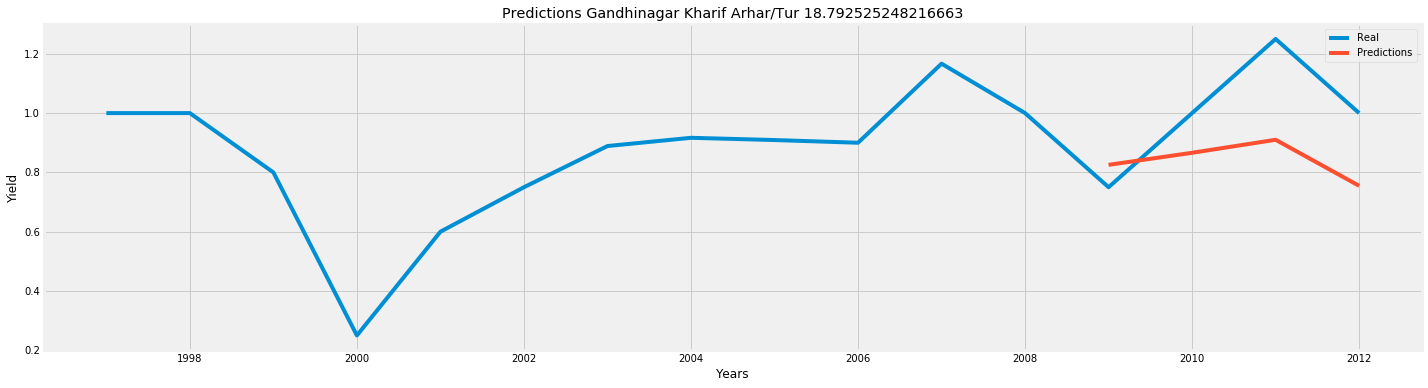

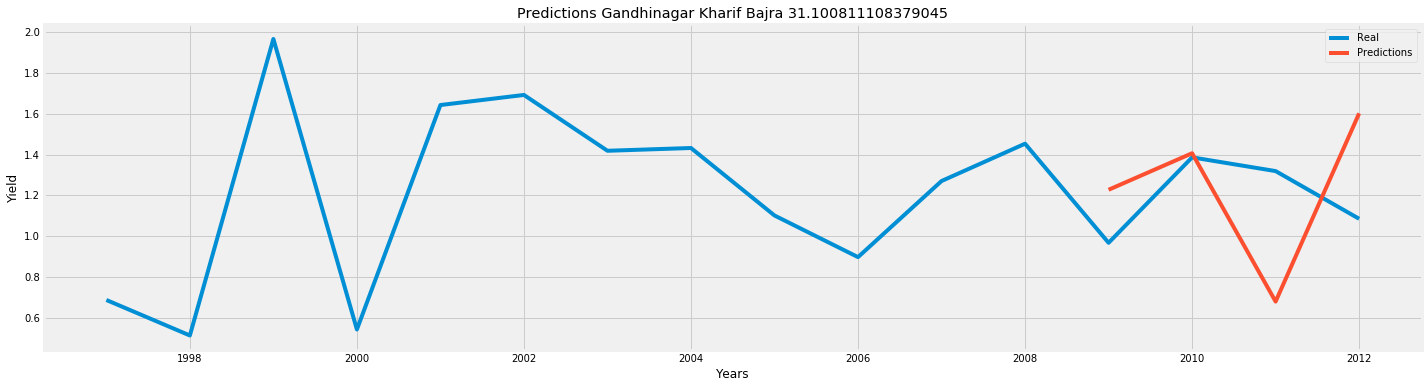

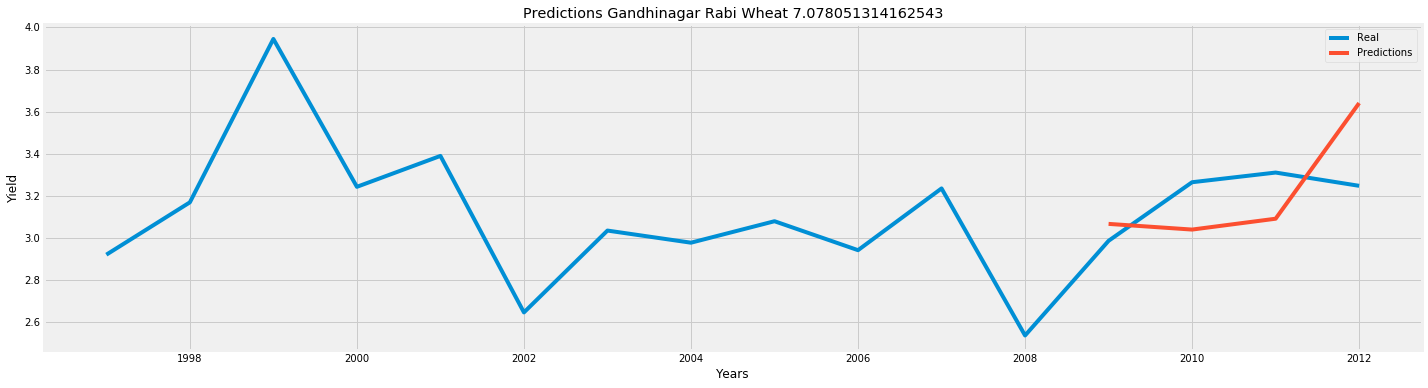

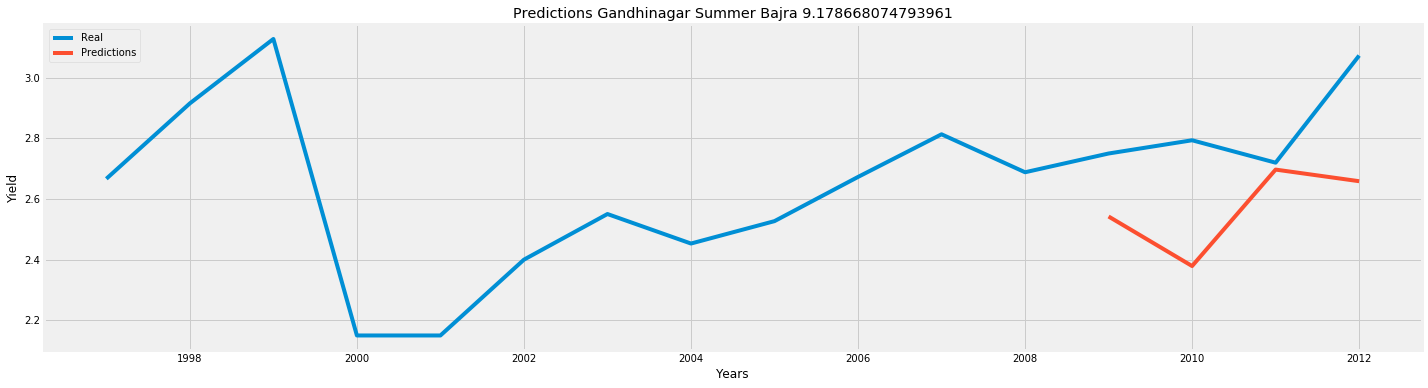

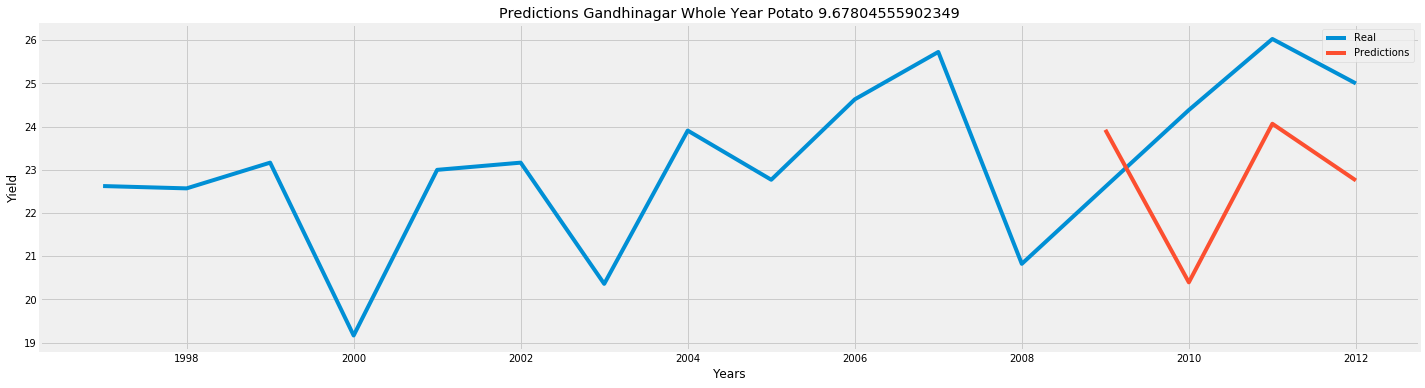

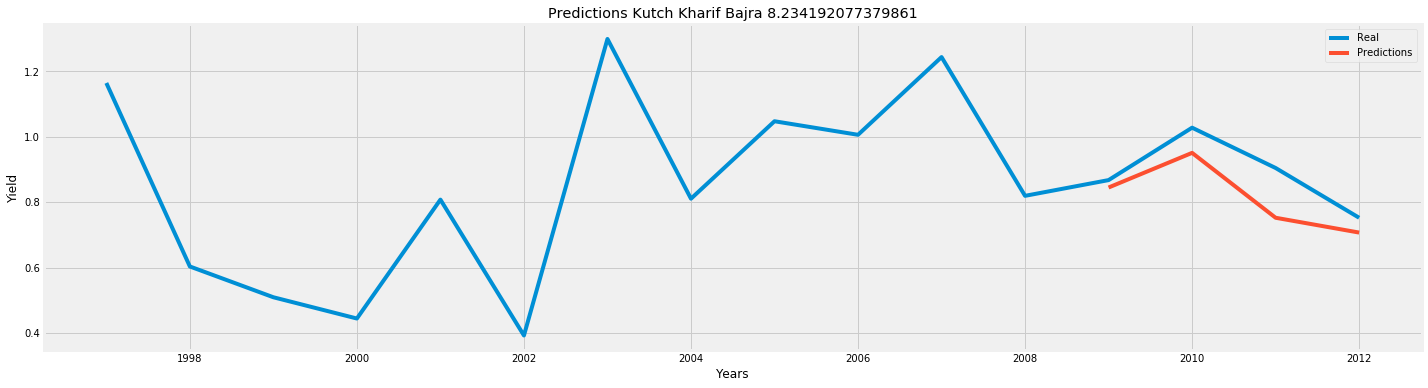

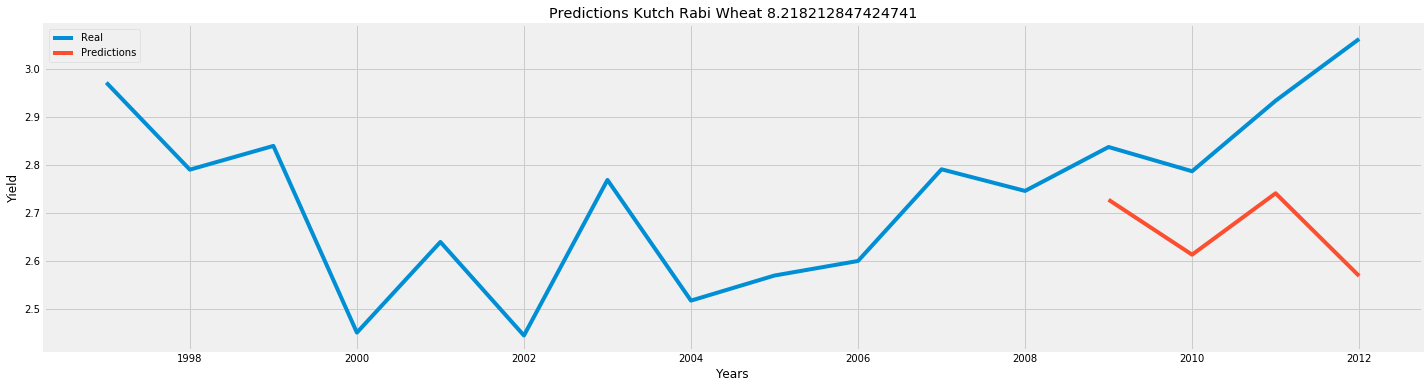

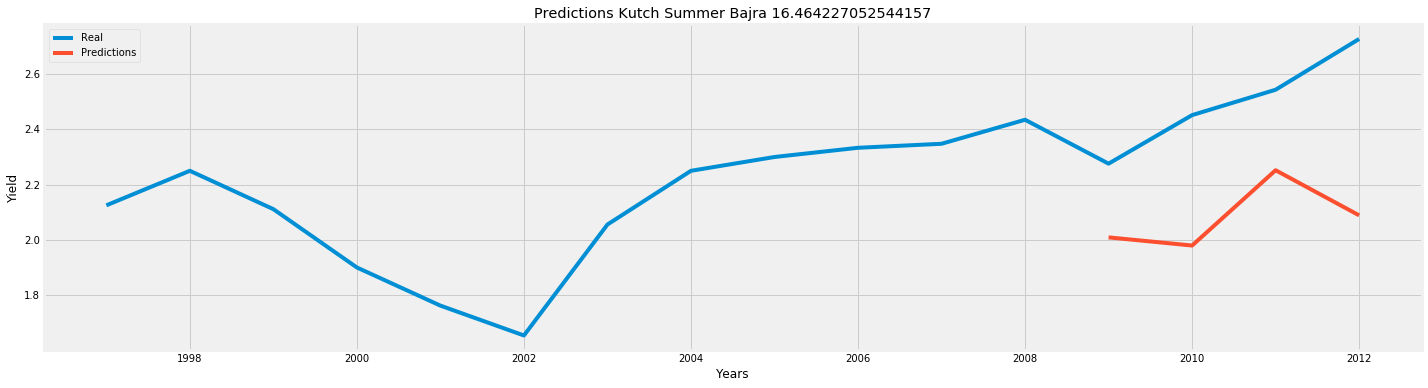

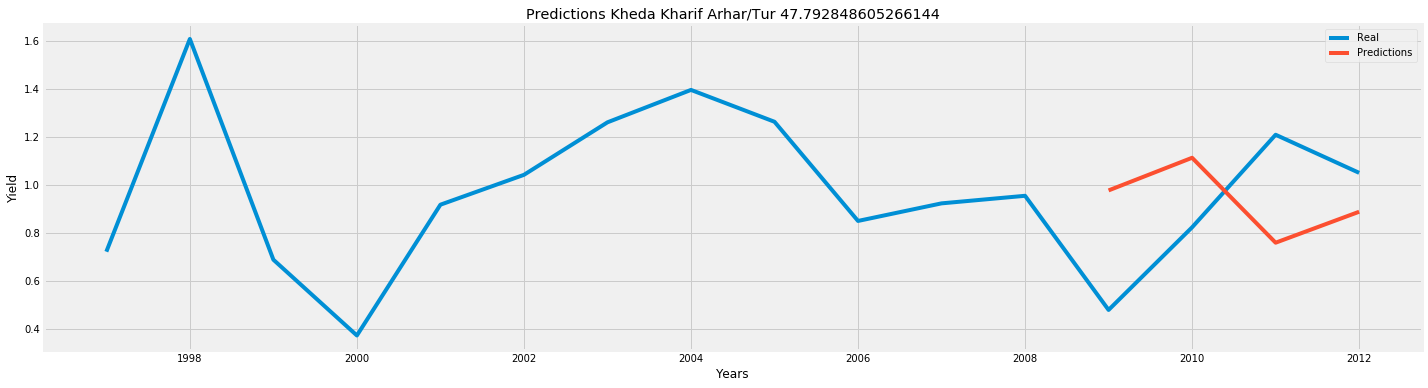

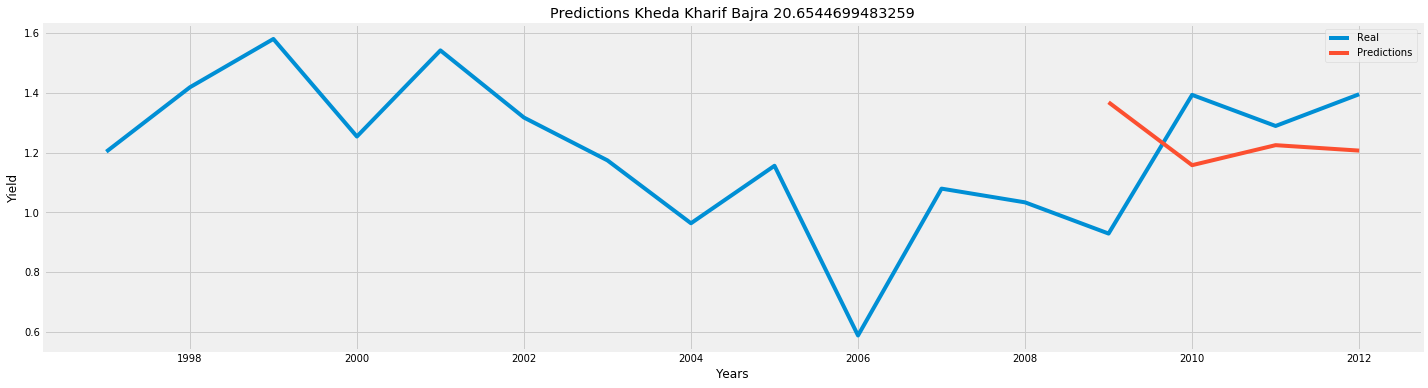

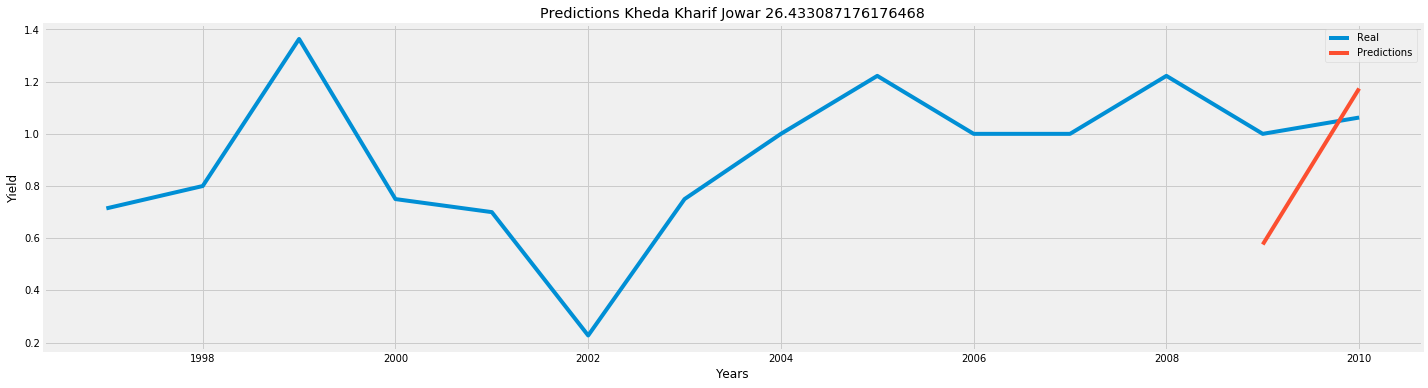

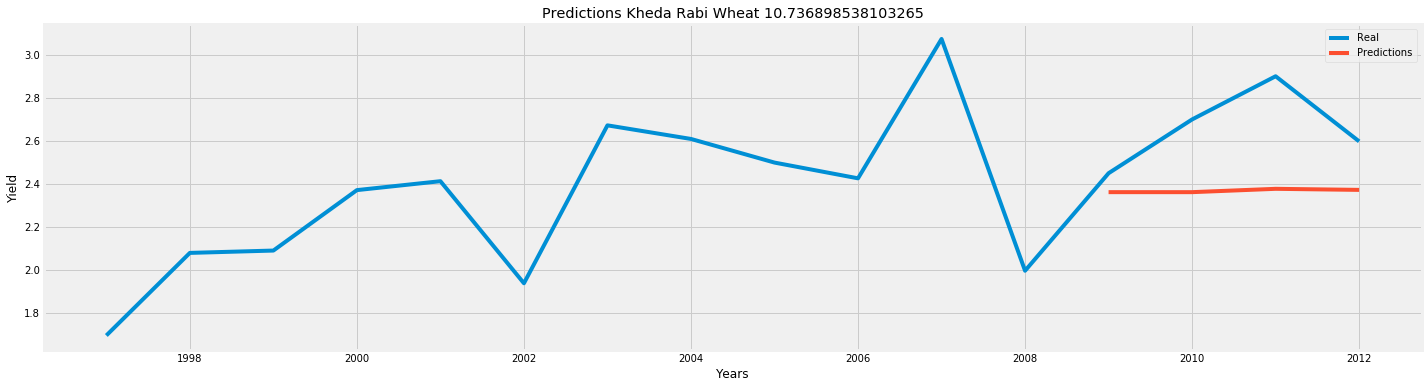

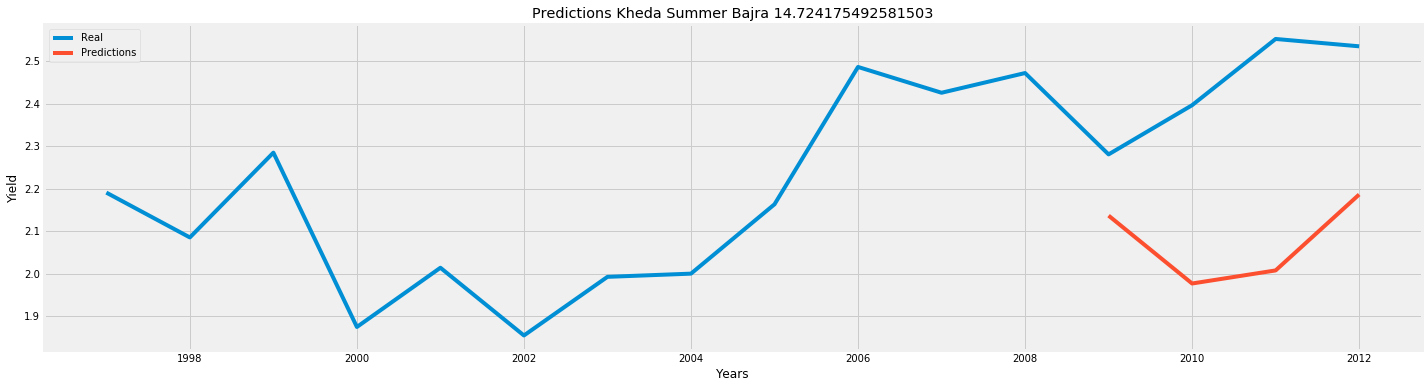

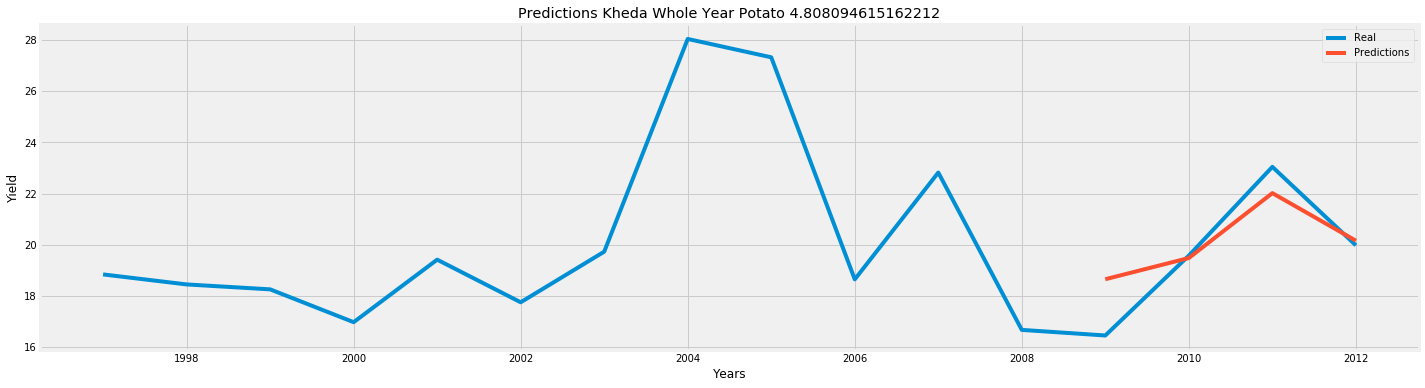

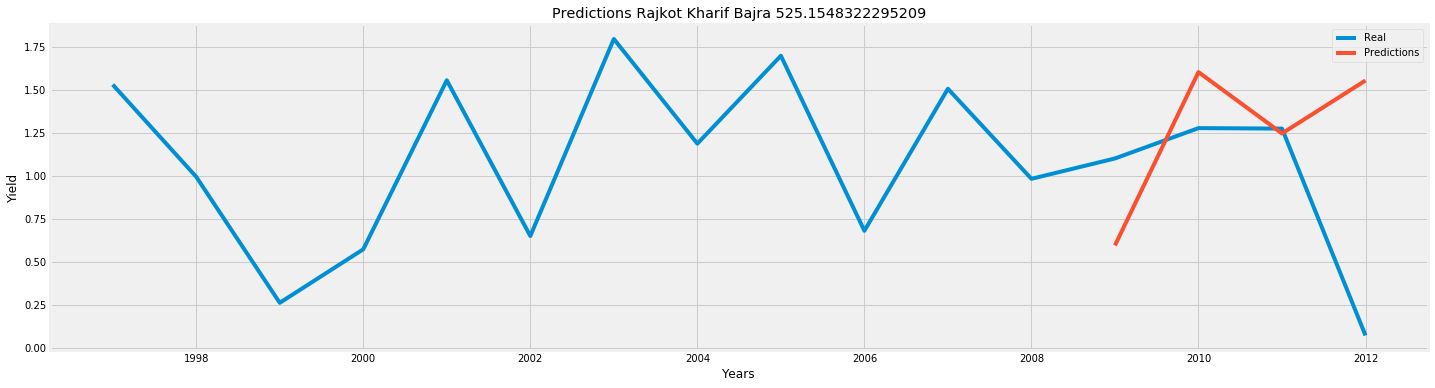

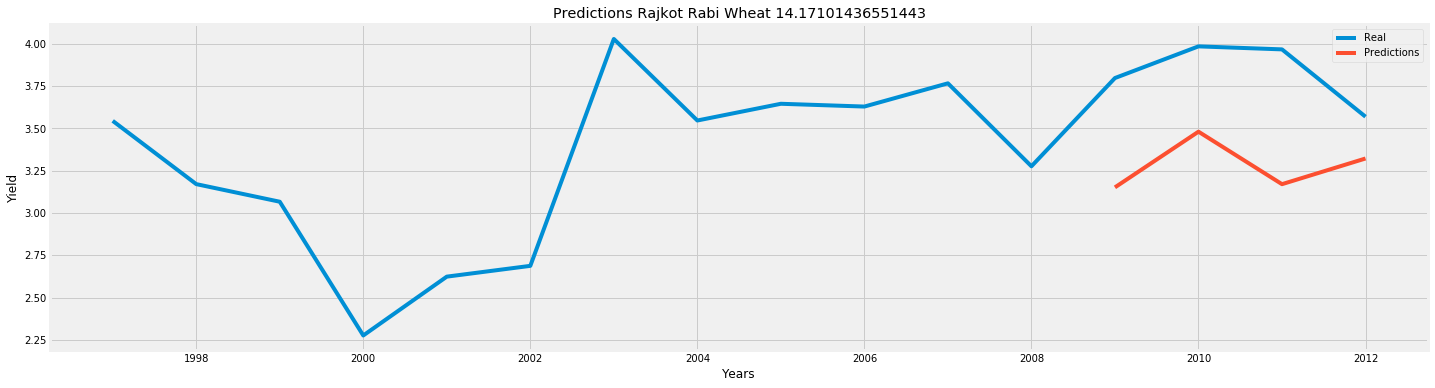

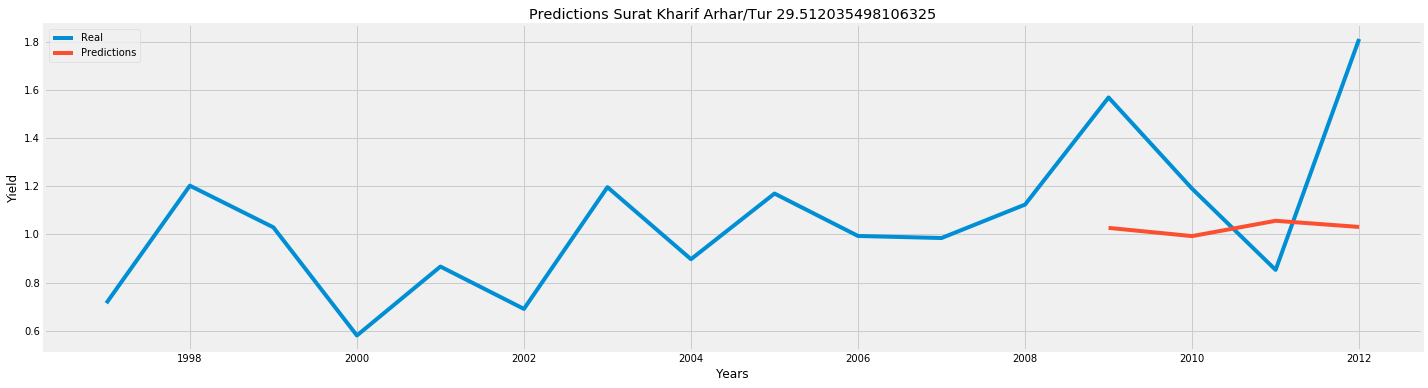

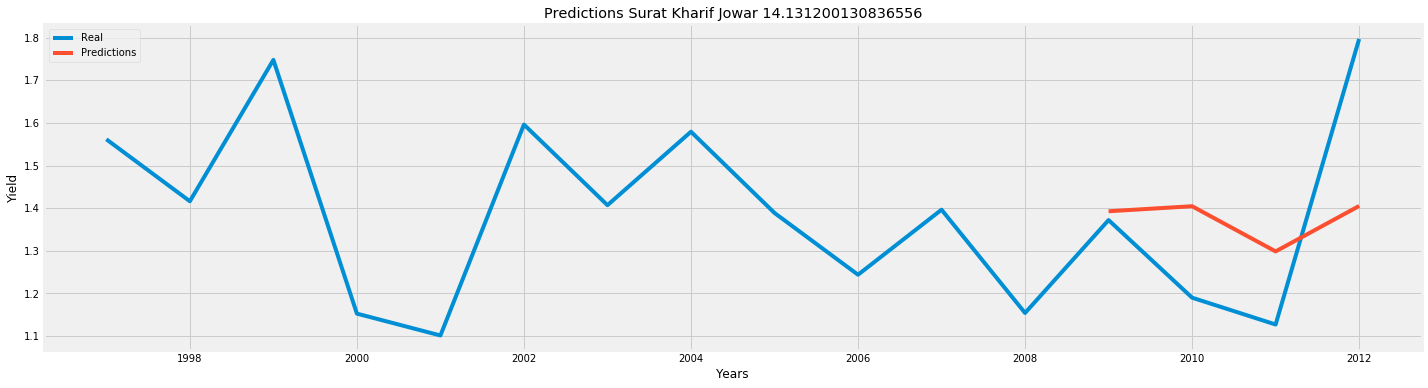

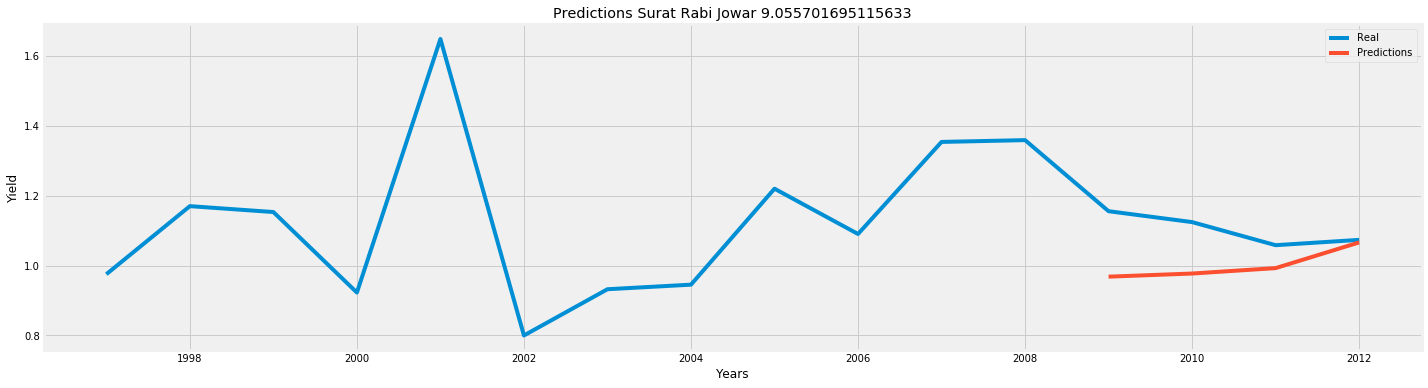

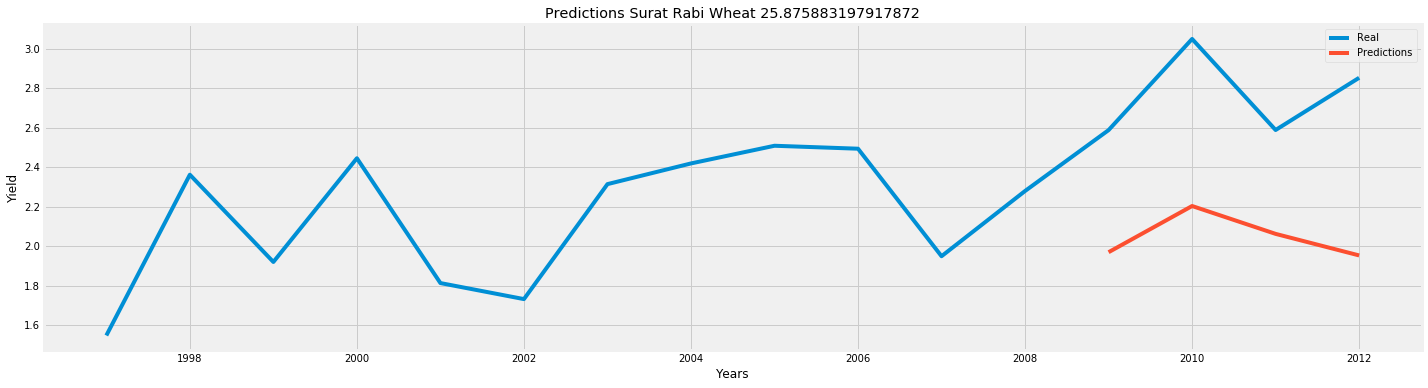

In [25]:
# Taking error=15
for city in list(df['City'].unique()):
    for season in list(df['Season'].unique()):
        for crop in list(df['Crop'].unique()):
            try:
                df_1=dataset(df,City=city,Season=season,Crop=crop)
                X_train, X_test, y_train, y_test = test_train_split(df_1)
                number=best_pca_components(X_train)
            ## Performing standardization before applying PCA
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.fit_transform(X_test)

                pca = PCA(n_components=number)
                X_train_pca = pca.fit_transform(X_train)
                X_test_pca = pca.transform(X_test)
                

                model = RandomForestRegressor()
                model.fit(X_train_pca, y_train)
                predictions=model.predict(X_test_pca)
                error=mean_absolute_percentage_error(y_test,predictions)
                plt.figure(figsize=(22,6))
                plt.plot(df_1.index,df_1['Yield'],label='Real')
                plt.plot(y_test.index,predictions,label='Predictions')
                plt.ylabel('Yield')
                plt.xlabel('Years')
                plt.title('Predictions '+str(city)+" "+str(season)+" "+str(crop)+" "+str(mean_absolute_percentage_error(y_test,predictions)))
                plt.legend()
                plt.show()
            except:
                continue